In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import ttest_ind
from scipy import stats

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from category_encoders import BinaryEncoder, TargetEncoder

# **Team Uniform** 
## Member: 
1) Arya Daffani
2) Adam Tiova Budhiharjo
3) Adri Hamdi

# **CHAPTER 1: BUSINESS CONCEPT**: 
## Company Overview
Olist is a technology company from Brazil operating in the e-commerce sector. Founded in 2015, Olist offers a SaaS (Software as a Service) platform that enables small and medium-sized businesses to sell their products online without the need to build a complex e-commerce infrastructure from scratch. In other words, Olist acts as an intermediary between sellers and buyers, providing various services such as order management, payments, logistics, and customer service.

As an online marketplace or shopping hub, Olist differentiates itself from competitors by focusing on seller reputation, strategic product placement, and a dedicated team supporting sales and customer service. Olist’s platform is also designed to accelerate the onboarding process for new sellers, allowing them to start selling their products online in a short amount of time. With this innovative business model, Olist has successfully attracted many sellers in Brazil and become one of the key players in the country’s e-commerce industry.

# **Introduction**
## Introduction to E-commerce
E-commerce, or electronic commerce, refers to the buying and selling of goods or services using the internet, and the transfer of money and data to execute these transactions. E-commerce has revolutionized the retail landscape by enabling digital transactions between consumers and businesses, and even between individuals. The growth of e-commerce has been propelled by its convenience, speed, and the broad range of products and services it offers, making it a crucial component of modern trade.

## Understanding the Marketplace Model
Within the broader e-commerce industry, the marketplace model stands out as a pivotal framework. A marketplace is a type of e-commerce site where product or service information is provided by multiple third parties, whereas transactions are processed by the marketplace operator. This model facilitates a vast network of buyers and sellers, fostering competitive prices and a diverse array of products. Notable examples include Amazon, eBay, and Alibaba, which have successfully integrated countless small businesses into their platforms, offering customers a comprehensive shopping experience.

## Olist: Pioneering E-commerce in Brazil
Olist, a prominent player in the Brazilian marketplace ecosystem, connects small businesses across Brazil to major e-commerce platforms, providing merchants with a broader audience and streamlined logistics. By aggregating various sellers from numerous categories, Olist ensures that even smaller vendors can benefit from the scale and reach that large e-commerce platforms provide. This approach not only democratizes access to digital sales channels but also enhances product variety and competitiveness within the marketplace.

## The Importance of Predicting Delivery Delays
In e-commerce, the efficiency of supply chain operations, particularly delivery times, plays a crucial role in shaping customer satisfaction and driving business success. Predicting delivery delays allows companies to manage customer expectations more effectively by providing timely updates and improving transparency. This, in turn, builds trust and strengthens customer loyalty. Additionally, anticipating delays helps businesses optimize their logistics and distribution processes, ensuring smooth operations while reducing unnecessary costs. In a highly competitive market, the ability to consistently meet or exceed delivery expectations can provide a significant edge. Overall, predicting delivery delays not only enhances customer experience but also improves operational efficiency and profitability, allowing businesses to better plan, execute, and scale their operations.

## Problem Statement :
Olist, a leading marketplace in Brazil, faces significant challenges related to delivery delays, which negatively impact both seller credibility and customer satisfaction. These delays not only erode customer trust but also harm the marketplace's reputation, leading to lower retention rates and potentially reduced profitability. As Olist continues to grow, accurately predicting and managing delivery delays becomes critical for enhancing operational efficiency, improving customer relations, and sustaining a competitive edge. By integrating advanced predictive analytics into its operations, Olist can anticipate and mitigate potential delays, ensuring reliable service delivery and optimizing supply chain management, which in turn boosts profitability and solidifies its position as a leader in the competitive e-commerce space.

## Stakeholders:
1. Management Logistics of Olist


## Goals
1. Predict if an order would be delayed
2. Identify key factors that contributes to delivery delays

## Target & Metrics

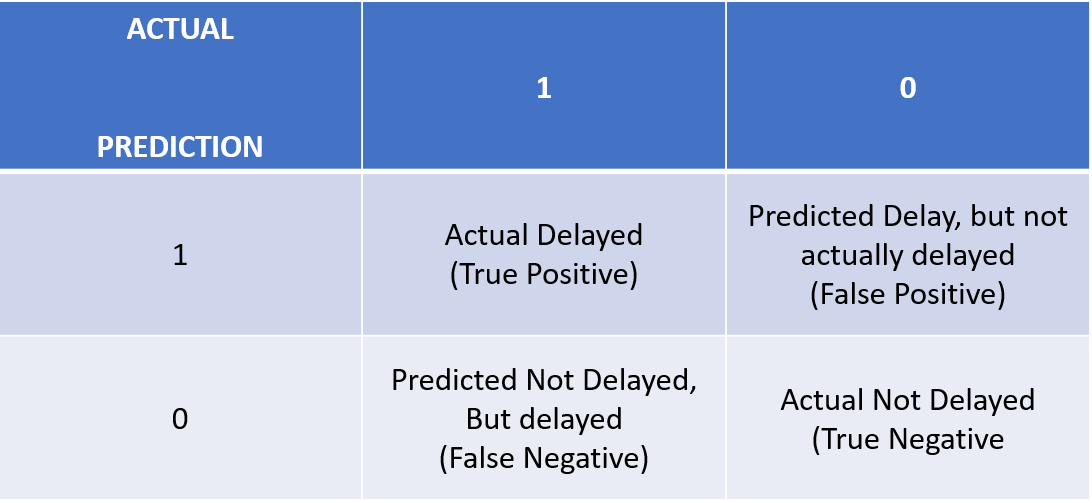

### Recall
Recall is a metric that indicates how well a model identifies positive instances. It is calculated using the formula:

Recall = TP / (TP + FN)

Where:
- **TP (True Positives)**: The number of correctly predicted positive instances.
- **FN (False Negatives)**: The number of actual positive instances that were incorrectly predicted as negative.

In the context of our analysis, a high recall means that we are capturing a significant portion of the actual delayed orders, thereby minimizing the number of false negatives.

### Precision
Precision measures the accuracy of the positive predictions made by the model. It is defined as:

Precision = TP / (TP + FP)

Where:
- **FP (False Positives)**: The number of actual negative instances that were incorrectly predicted as positive.

A high precision indicates that when the model predicts an order is delayed, it is likely to be correct.


## False Negatives and False Positives

- **False Negative**: This occurs when orders are predicted to be on time but are actually delayed. The risk of having false negatives is particularly high as it can lead to lower rating scores for products, which may ultimately reduce customer satisfaction and retention.

- **False Positive**: This happens when orders are predicted to be delayed but are actually on time. While this might create unnecessary concern, it is generally less damaging than false negatives in our scenario.

## Why Focus on Recall?
The focus on recall is critical in our context because capturing as many true positives as possible is essential. Since false negatives can significantly impact customer perception and satisfaction, it is imperative to minimize their occurrence. Therefore, by prioritizing recall, we aim to ensure that most delayed orders are identified correctly, enhancing customer trust and product ratings.

### Estimating Losses
To estimate the potential losses incurred from false negatives, we can compare the raw losses to the actual `price` of the delayed orders. By analyzing the impact of missed delayed orders, we can better understand the financial implications and the importance of our predictive model.

In summary, while both recall and precision are important metrics, our primary focus is on recall to effectively reduce false negatives and maintain customer satisfaction.

## Analytic Approach EDA
- Find out if delay causes rating to go down
- Explore about the delivery delays per product categories
- Analyze order status distribution 
- Impact of payment type on delivery 
- Correlation between product dimension and freight value
- If delay increases by time


# **CHAPTER 2: DATASET LOADING, MERGING AND CLEAINNG**

### We begin by loading each dataset. Because our EDA will cover a wide analysis, we are using and combining all the datasets. For reference, here is the key id that connects the datasets 

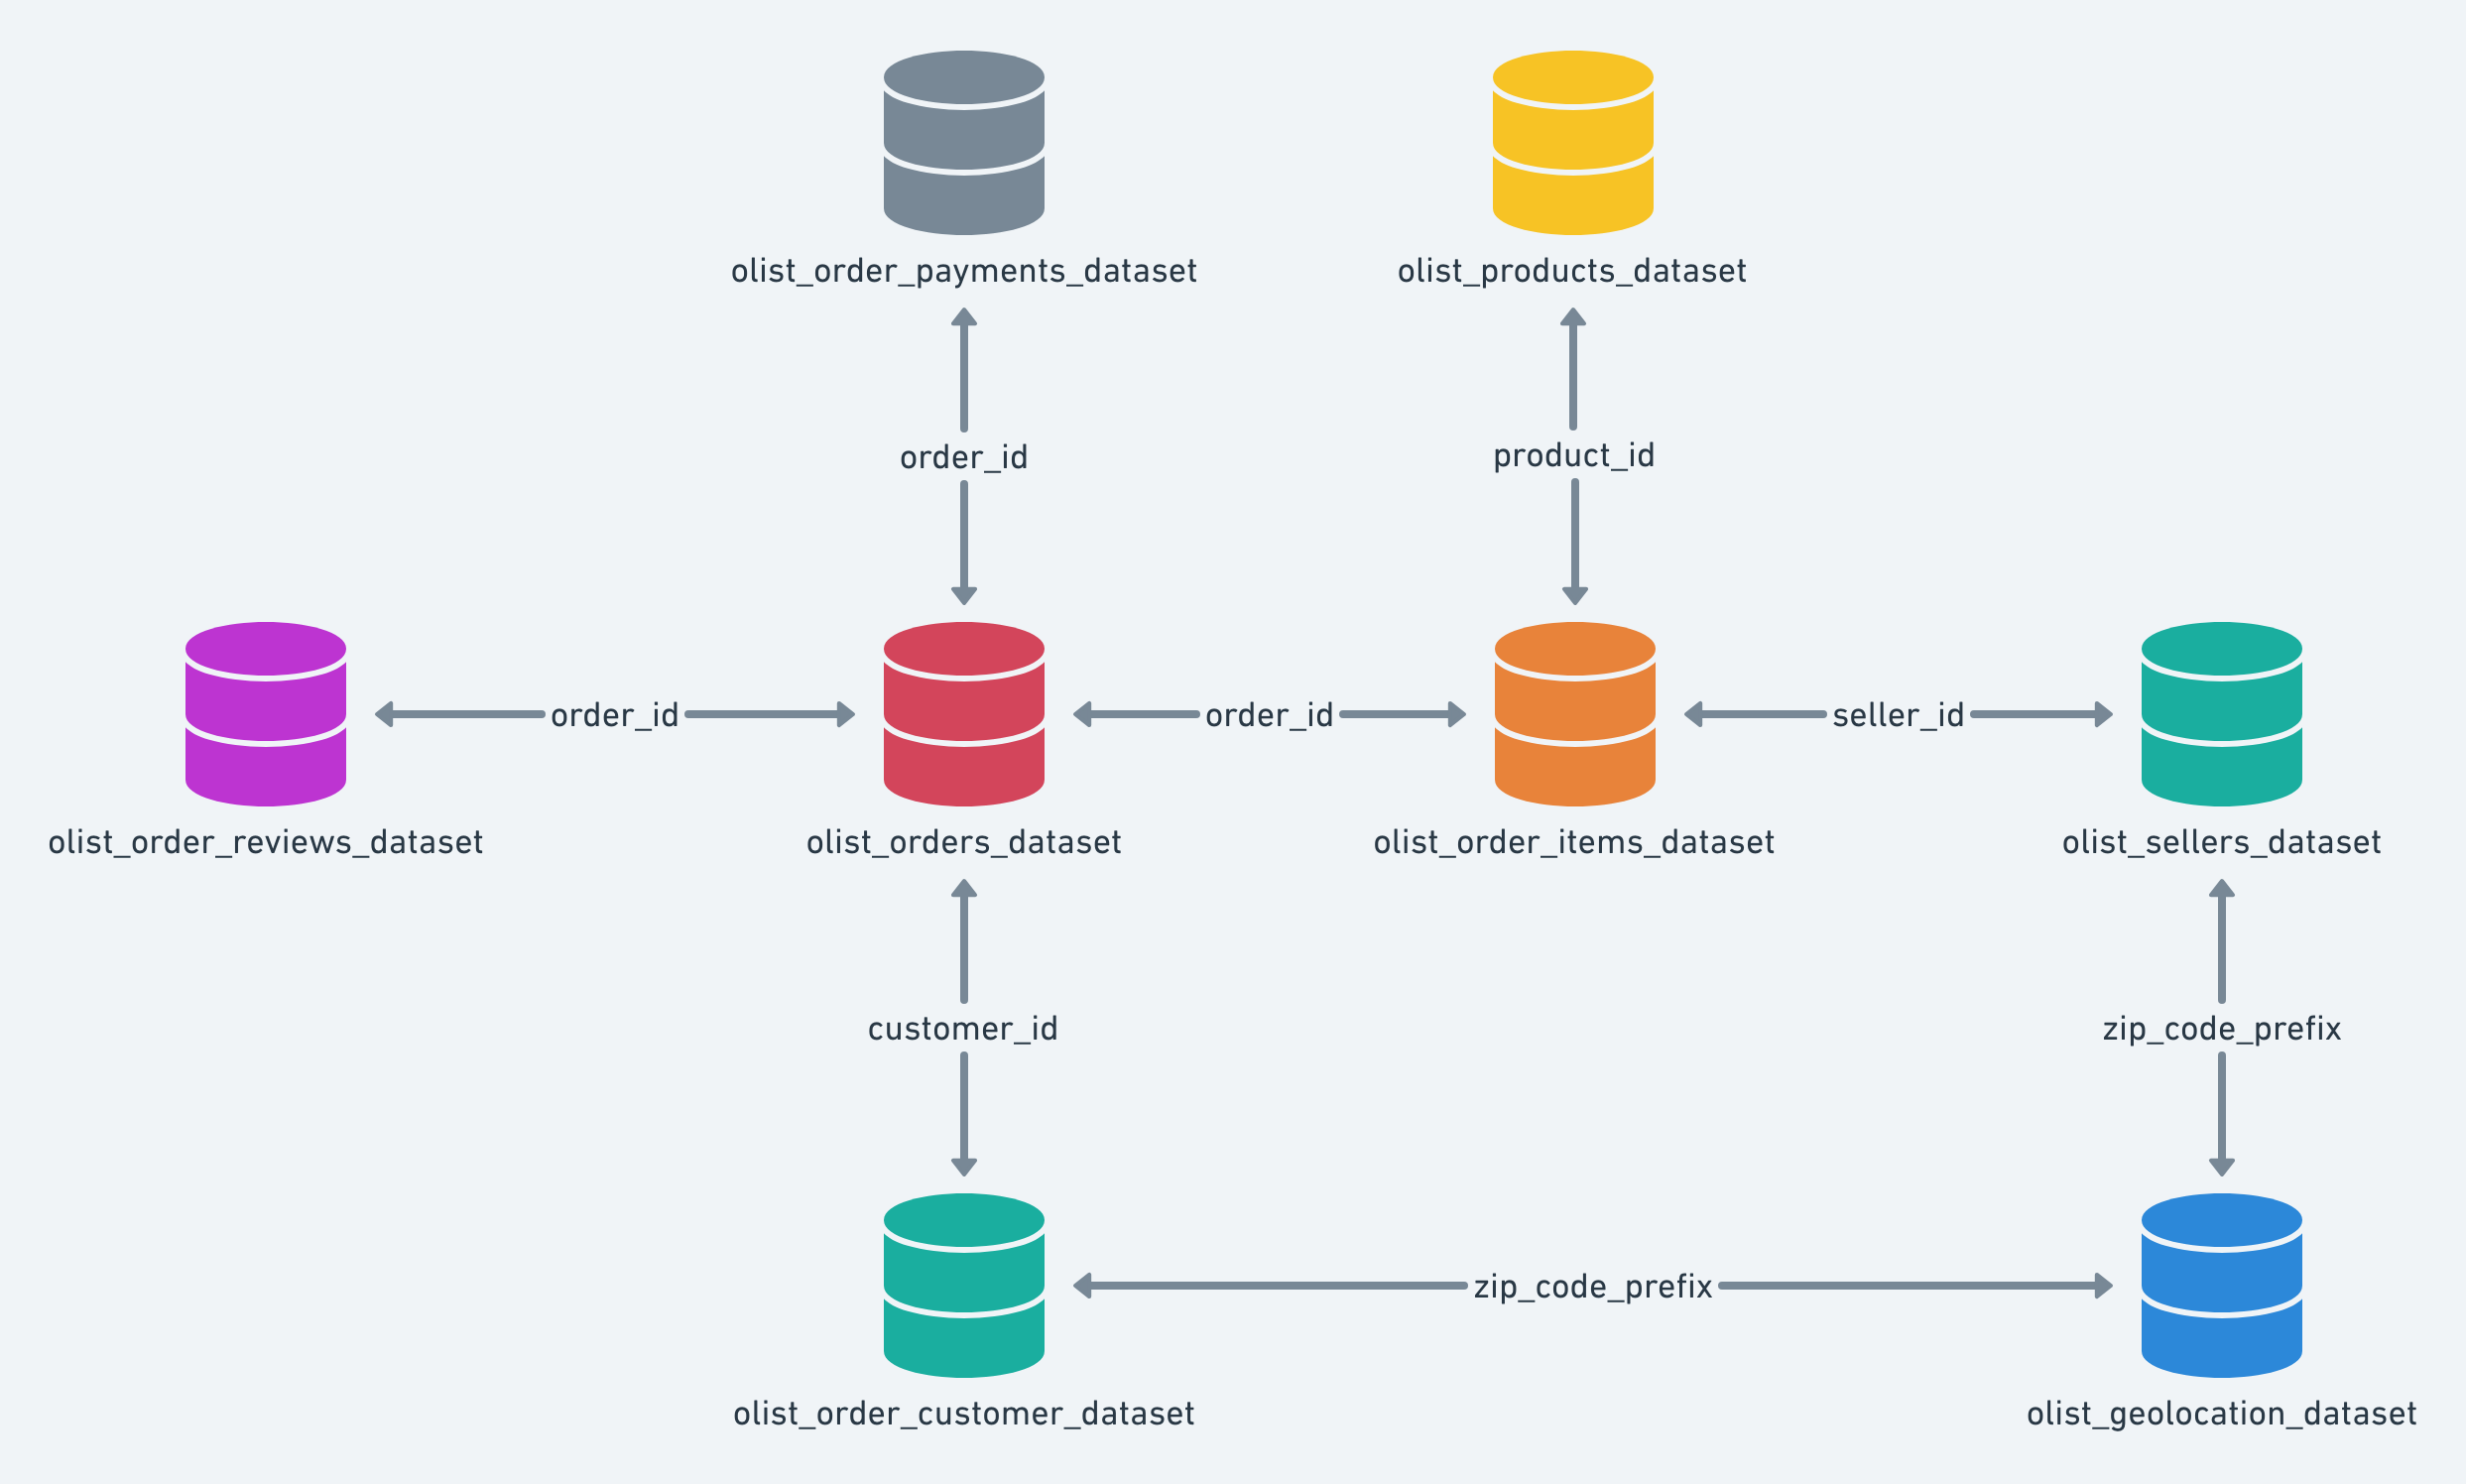

In [2]:
import pandas as pd

# Load datasets
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
product_translation = pd.read_csv('product_category_name_translation.csv')

def get_mode(series):
    modes = series.mode()
    return modes.iloc[0] if not modes.empty else None

# Aggregate geolocation data
geo_mode = geolocation.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': get_mode, 
    'geolocation_lng': get_mode
}).reset_index()

# Rename the geolocation columns for merging
geo_mode.rename(columns={
    'geolocation_zip_code_prefix': 'zip_code_prefix',
    'geolocation_lat': 'lat', 
    'geolocation_lng': 'lng'
}, inplace=True)

# Merge geolocation with customers and sellers
customers = pd.merge(customers, geo_mode, left_on='customer_zip_code_prefix', right_on='zip_code_prefix', how='left')
sellers = pd.merge(sellers, geo_mode, left_on='seller_zip_code_prefix', right_on='zip_code_prefix', how='left')

# Continue with merging other datasets
orders_customers = pd.merge(orders, customers, on='customer_id', how='left')
order_full = pd.merge(order_items, orders_customers, on='order_id', how='left')
products_full = pd.merge(products, product_translation, on='product_category_name', how='left')
order_full = pd.merge(order_full, products_full, on='product_id', how='left')
order_full = pd.merge(order_full, sellers, on='seller_id', how='left')
order_full = pd.merge(order_full, order_payments, on='order_id', how='left')
order_full = pd.merge(order_full, order_reviews, on='order_id', how='left')

# Save the final merged dataset
order_full.to_csv('combined_dataset.csv', index=False)


In [3]:
order_full.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,zip_code_prefix_x,lat_x,lng_x,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,zip_code_prefix_y,lat_y,lng_y,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,28013.0,-21.758679,-41.300239,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP,27277.0,-22.498183,-44.123614,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,15775.0,-20.216537,-50.926688,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,3471,sao paulo,SP,3471.0,-23.563590,-46.515620,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,35661.0,-19.918485,-44.600659,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,37564,borda da mata,MG,37564.0,-22.265723,-46.165525,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,12952.0,-23.047478,-46.674795,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,14403,franca,SP,14403.0,-20.542234,-47.378964,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,13226.0,-23.249008,-46.835690,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,87900,loanda,PR,87900.0,-22.927128,-53.148630,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


## Next, we will make a function to accurately describe each of the coloumns. The function, when called upon, will show a table showing Feature	name, Data Type, NaN, NaN %, Unique, Unique No, Outlier (1.5xIQR), Extreme (3xIQR), Outlier %, Extreme % and Duplicated Rows. This way, it would be easier to identify which coloumn needs cleaning. Let's begin analyzing which coloumn needs to be cleaned.

In [4]:
import pandas as pd

def data_quality_report(df):
    # Initialize the list for feature summary
    feature_summary_list = []

    # Function to calculate outliers and extremes
    def calculate_outliers(series):
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        extreme_lower_bound = q1 - 3 * iqr
        extreme_upper_bound = q3 + 3 * iqr

        outliers = series[(series < lower_bound) | (series > upper_bound)]
        extremes = series[(series < extreme_lower_bound) | (series > extreme_upper_bound)]

        return len(outliers), len(extremes), len(outliers) / len(series) * 100, len(extremes) / len(series) * 100

    # Check for duplicate rows overall in the DataFrame
    duplicate_rows = df.duplicated().sum()

    # Loop through each feature to gather required information
    for col in df.columns:
        data_type = df[col].dtype
        nan_count = df[col].isna().sum()
        nan_percentage = nan_count / len(df) * 100
        unique_values = df[col].unique()
        unique_no = len(df[col].unique())

        if pd.api.types.is_numeric_dtype(df[col]):
            outliers, extremes, outlier_percentage, extreme_percentage = calculate_outliers(df[col].dropna())
        else:
            outliers, extremes, outlier_percentage, extreme_percentage = 0, 0, 0, 0

        feature_summary_list.append({
            'Feature': col,
            'Data Type': data_type,
            'NaN': nan_count,
            'NaN %': nan_percentage,
            'Unique': unique_values,
            'Unique No': unique_no,
            'Outlier (1.5xIQR)': outliers,
            'Extreme (3xIQR)': extremes,
            'Outlier %': outlier_percentage,
            'Extreme %': extreme_percentage,
            'Duplicated Rows': duplicate_rows  # Add duplicate row count to each feature
        })

    # Convert the list to a DataFrame
    feature_summary = pd.DataFrame(feature_summary_list)

    return feature_summary

# Example usage:
# df = pd.read_csv('your_dataset.csv')  # Load your data
# report = data_quality_report(df)
# print(report)

data_quality_report(order_full)

,Feature,Data Type,NaN,NaN %,Unique,Unique No,Outlier (1.5xIQR),Extreme (3xIQR),Outlier %,Extreme %,Duplicated Rows
0,order_id,object,0,0.000000,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f...",98666,0,0,0.000000,0.000000,0
1,order_item_id,int64,0,0.000000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",21,14665,14665,12.395402,12.395402,0
2,product_id,object,0,0.000000,"[4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802...",32951,0,0,0.000000,0.000000,0
3,seller_id,object,0,0.000000,"[48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b...",3095,0,0,0.000000,0.000000,0
4,shipping_limit_date,object,0,0.000000,"[2017-09-19 09:45:35, 2017-05-03 11:05:13, 201...",93318,0,0,0.000000,0.000000,0
5,price,float64,0,0.000000,"[58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9,...",5968,8867,4298,7.494717,3.632829,0
6,freight_value,float64,0,0.000000,"[13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11....",6999,12740,5847,10.768321,4.942101,0
7,customer_id,object,0,0.000000,"[3ce436f183e68e07877b285a838db11a, f6dd3ec061d...",98666,0,0,0.000000,0.000000,0
8,order_status,object,0,0.000000,"[delivered, shipped, canceled, invoiced, proce...",7,0,0,0.000000,0.000000,0
9,order_purchase_timestamp,object,0,0.000000,"[2017-09-13 08:59:02, 2017-04-26 10:53:06, 201...",98112,0,0,0.000000,0.000000,0


## - for coloumns 'shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', the data type is object, and we need to convert it to datetime format to allow us to analyze and compare the date and time further

In [5]:
# making sure date coloumns are in datetime format
date_columns = [
    'shipping_limit_date', 
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date', 
    'review_creation_date', 
    'review_answer_timestamp'
]

for column in date_columns:
    order_full[column] = pd.to_datetime(order_full[column], errors='coerce')  # 'coerce' will set invalid parsing as NaT


##  next lets proceed with the NaN in 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'. We filter the rows which has NaN to see if there's any pattern.

In [6]:
# Combine the conditions using the logical OR operator
nan_dates = order_full[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().any(axis=1)

# Display rows where any of the date columns is NaN
orderna = order_full[nan_dates]
orderna

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,zip_code_prefix_x,lat_x,lng_x,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,zip_code_prefix_y,lat_y,lng_y,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
80,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaT,2018-04-16,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,42804.0,-12.723177,-38.330285,cama_mesa_banho,52.0,337.0,1.0,800.0,16.0,10.0,16.0,bed_bath_table,14940,ibitinga,SP,14940.0,-21.774868,-48.847152,1.0,voucher,1.0,44.11,396eacbff771557619771e8d4b58ee77,3.0,NaN,Minha mercadoria não chegou e ninguém entrou e...,2018-04-18,2018-04-20 05:01:01
81,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaT,2018-04-16,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,42804.0,-12.723177,-38.330285,cama_mesa_banho,52.0,337.0,1.0,800.0,16.0,10.0,16.0,bed_bath_table,14940,ibitinga,SP,14940.0,-21.774868,-48.847152,2.0,voucher,1.0,33.18,396eacbff771557619771e8d4b58ee77,3.0,NaN,Minha mercadoria não chegou e ninguém entrou e...,2018-04-18,2018-04-20 05:01:01
86,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,39.90,15.38,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,NaT,NaT,2018-08-29,ec979208947bbba310f2ad8e50963725,31160,belo horizonte,MG,31160.0,-19.877866,-43.930432,utilidades_domesticas,58.0,1245.0,1.0,200.0,16.0,12.0,11.0,housewares,5043,sao paulo,SP,5043.0,-23.527174,-46.693144,1.0,credit_card,2.0,55.28,8f28fc7d29a09403973697645d73b72a,1.0,NaN,NaN,2018-08-31,2018-08-31 22:49:14
269,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,2018-08-21 16:35:18,52.99,22.30,7a399396442d5601cbedfbd0a3cf1da4,shipped,2018-08-17 16:25:04,2018-08-17 16:35:18,2018-08-18 09:07:00,NaT,2018-09-18,60ec651482858c327c177cf9360cc0a2,45990,teixeira de freitas,BA,45990.0,-17.541181,-39.728195,informatica_acessorios,59.0,1775.0,4.0,350.0,25.0,11.0,15.0,computers_accessories,14802,araraquara,SP,14802.0,-21.775406,-48.168105,1.0,credit_card,4.0,75.29,e92a1612d8dcd014217178bd28cc54b2,5.0,"ótimo,super recomendo",comprometimento com o cliente,2018-08-25,2018-08-25 23:44:42
279,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,27.90,9.26,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,NaT,NaT,2018-05-17,f0b9f688a3b9151bc6b38f4b5b36ea44,6539,santana de parnaiba,SP,6539.0,-23.456727,-46.903482,automotivo,52.0,1139.0,1.0,600.0,16.0,11.0,11.0,auto,13408,piracicaba,SP,13408.0,-22.679395,-47.701841,1.0,credit_card,1.0,37.16,f9c1a71690bf7288861804ece5383ea1,2.0,Não posso avaliar ainda,Não recebi o produto ainda,2018-05-19,2018-05-20 18:56:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117844,feebdfdb4759bd4600d52547c81b4fa8,1,0c7536abc1af51a81fa806097dfe3597,7d76b645482be4a33237

In [7]:
description = orderna.describe(include=[np.number])  
description

,order_item_id,price,freight_value,customer_zip_code_prefix,zip_code_prefix_x,lat_x,lng_x,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,zip_code_prefix_y,lat_y,lng_y,payment_sequential,payment_installments,payment_value,review_score
count,2604.000000,2604.000000,2604.000000,2604.000000,2590.000000,2590.000000,2590.000000,2532.000000,2532.000000,2532.000000,2604.000000,2604.000000,2604.000000,2604.000000,2604.000000,2600.000000,2600.000000,2600.000000,2604.000000,2604.000000,2604.000000,2487.000000
mean,1.172811,153.487078,22.292873,33740.320276,33576.891506,-20.676350,-45.697675,47.215640,837.122433,2.144550,2412.973886,31.461214,18.397849,23.554531,23881.713902,23796.273846,-22.802759,-47.156573,1.217742,3.054147,206.475887,1.772014
std,0.614911,236.896771,20.261517,28402.841301,28365.987490,5.984792,4.218346,10.643838,736.206427,1.690737,4366.672369,18.737230,14.769998,12.510177,26935.716083,26867.518599,2.339498,2.312351,1.773318,2.849225,323.372311,1.337878
min,1.000000,3.500000,0.000000,1014.000000,1014.000000,-32.095725,-67.809406,7.000000,30.000000,1.000000,50.000000,13.000000,2.000000,9.000000,1026.000000,1026.000000,-31.764283,-67.809406,1.000000,1.000000,0.000000,1.000000
25%,1.000000,41.757500,13.267500,11341.250000,11312.500000,-23.554196,-47.515080,40.000000,360.000000,1.000000,300.000000,18.000000,10.000000,15.000000,6429.000000,6429.000000,-23.584931,-48.252690,1.000000,1.000000,63.077500,1.000000
50%,1.000000,84.990000,16.540000,23087.000000,23071.500000,-22.920083,-46.551513,49.000000,601.000000,1.000000,700.000000,25.000000,15.000000,20.000000,13660.000000,13660.000000,-23.437975,-46.711955,1.000000,2.000000,114.450000,1.000000
75%,1.000000,160.000000,22.890000,55590.500000,55180.000000,-19.918778,-43.332137,56.000000,999.000000,3.000000,2162.500000,39.000000,24.000000,30.000000,28960.000000,28476.250000,-21.944792,-46.513723,1.000000,4.000000,216.000000,2.000000
max,6.000000,2649.000000,262.720000,99990.000000,99990.000000,2.845886,-34.826766,69.000000,3992.000000,19.000000,30000.000000,105.000000,105.000000,105.000000,98910.000000,98910.000000,-2.491915,-34.939380,29.000000,20.000000,4809.440000,5.000000


In [8]:
orderna.groupby('order_status')[['order_id']].count()

,order_id
order_status,
approved,3
canceled,563
delivered,24
invoiced,376
processing,376
shipped,1255
unavailable,7


## - Based on the data shown, it shows that the mean review score is 1.77.
## - The aggregration of order_status shows that most of the orders are not delivered, with mostly stuck in shipped.
## - These rows of data contains a lot of crucial information about orders that are problematic, so we cannot remove the data. We must impute the NaN in a way that it retains the delayed infromation. 

### As This valuable data cannot be removed, hence we must fill the NaN with values that retain our main goal: that the order is delayed. To impute, let's find the average time delays between:

    - 'order_purchase_timestamp', 
    - 'order_approved_at', 
    - 'order_delivered_carrier_date', 
    - 'order_delivered_customer_date', 
    - 'order_estimated_delivery_date', 

In [9]:
# Calculate the differences as Timedelta
time_diffs = {
    'purchase_to_approved': (order_full['order_approved_at'] - order_full['order_purchase_timestamp']).dropna(),
    'approved_to_carrier': (order_full['order_delivered_carrier_date'] - order_full['order_approved_at']).dropna(),
    'carrier_to_customer': (order_full['order_delivered_customer_date'] - order_full['order_delivered_carrier_date']).dropna()
}

# Calculate mean of time differences
avg_time_diffs = {k: v.mean() for k, v in time_diffs.items()}
print("Average Time Intervals:", avg_time_diffs)

Average Time Intervals: {'purchase_to_approved': Timedelta('0 days 10:29:46.782366118'), 'approved_to_carrier': Timedelta('2 days 20:32:47.921292538'), 'carrier_to_customer': Timedelta('9 days 04:50:24.979113557')}


## As the result shows, the time delay between:
- Purchase to approved is around 10 hours
- Approved to carrier is 2 days 20 hours
- Carrier to customer is 9 days four hours

## We will use this data to impute the missing, but with an exception to the `order_delivered_customer_date`, which will be `order_estimated_delivery_date` + 1 day since we want to retain the crucial information that order is delayed. 

In [10]:
# Define average time intervals
purchase_to_approved = pd.Timedelta('10 hours 29 minutes 6 seconds')
approved_to_carrier = pd.Timedelta('2 days 20 hours 32 minutes 47 seconds')
carrier_to_customer = pd.Timedelta('9 days 4 hours 50 minutes 24 seconds')

# Impute missing 'order_approved_at' using 'order_purchase_timestamp' + average purchase to approved time
order_full.loc[order_full['order_approved_at'].isna(), 'order_approved_at'] = \
    order_full['order_purchase_timestamp'] + purchase_to_approved

# Impute missing 'order_delivered_carrier_date' using 'order_approved_at' + average approved to carrier time
order_full.loc[order_full['order_delivered_carrier_date'].isna(), 'order_delivered_carrier_date'] = \
    order_full['order_approved_at'] + approved_to_carrier

# Impute 'order_delivered_customer_date' using 'order_estimated_delivery_date' + 1 day
order_full.loc[order_full['order_delivered_customer_date'].isna(), 'order_delivered_customer_date'] = \
    order_full['order_estimated_delivery_date'] + pd.Timedelta('1 day')

# Check remaining NaN values in these columns
nan_counts = {
    'order_approved_at': order_full['order_approved_at'].isna().sum(),
    'order_delivered_carrier_date': order_full['order_delivered_carrier_date'].isna().sum(),
    'order_delivered_customer_date': order_full['order_delivered_customer_date'].isna().sum(),
    'order_estimated_delivery_date': order_full['order_estimated_delivery_date'].isna().sum()
}

print("Remaining NaN counts in date columns:", nan_counts)

Remaining NaN counts in date columns: {'order_approved_at': 0, 'order_delivered_carrier_date': 0, 'order_delivered_customer_date': 0, 'order_estimated_delivery_date': 0}


## As we can see, there are no more NaN on the  'order_approved_at', 'order_delivered_carrier_date' and 'order_delivered_customer_date' coloumns. Let's proceed with coloumns that has a negligible NaN values (less than 0.5% of data)

## Since these NaN are less than 0.5% on average, it is much more simple to just remove them. Here are the coloumns listed: 'zip_code_prefix_x', 'lat_x', 'lng_x', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm','zip_code_prefix_y', 'lat_y', 'lng_y', 'payment_sequential','payment_type', 'payment_installments', 'payment_value'

In [11]:
# Remove rows where any of the specific columns have missing data
columns_to_check = ['zip_code_prefix_x', 'lat_x', 'lng_x', 'product_weight_g', 
                    'product_length_cm', 'product_height_cm', 'product_width_cm',
                    'zip_code_prefix_y', 'lat_y', 'lng_y', 'payment_sequential',
                    'payment_type', 'payment_installments', 'payment_value']

order_full.dropna(subset=columns_to_check, inplace=True)

# Check to ensure no NaN values remain in these columns
nan_check = order_full[columns_to_check].isna().sum()
print("Remaining NaN values after removal:")
print(nan_check)

Remaining NaN values after removal:
zip_code_prefix_x       0
lat_x                   0
lng_x                   0
product_weight_g        0
product_length_cm       0
product_height_cm       0
product_width_cm        0
zip_code_prefix_y       0
lat_y                   0
lng_y                   0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


## Now that the NaN values on those are dealt with, let's proceed with the coloumns 'product_category_name', 'product_name_lenght', 'product_description_lenght','product_photos_qty', 'product_weight_g', 'product_length_cm','product_height_cm', 'product_width_cm', 'product_category_name_english'

In [12]:
# Define the columns to check for NaN values
product_columns = [
    'product_category_name', 'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g', 'product_length_cm',
    'product_height_cm', 'product_width_cm', 'product_category_name_english'
]

# Display rows where any of these columns have NaN values
nan_product_rows = order_full[product_columns].isna().any(axis=1)
nan_product_data = order_full[nan_product_rows]

# Display the data
nan_product_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,zip_code_prefix_x,lat_x,lng_x,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,zip_code_prefix_y,lat_y,lng_y,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
126,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-02 15:49:17,7.79,7.78,ae55e228ded796581eccc67045516023,delivered,2017-09-26 15:24:03,2017-09-26 15:49:17,2017-09-28 18:42:42,2017-09-29 18:29:50,2017-10-11,b0efd7adeb04d15b16edaedd11215d40,2712,sao paulo,SP,2712.0,-23.504903,-46.677070,NaN,NaN,NaN,NaN,200.0,16.0,5.0,12.0,NaN,4763,sao paulo,SP,4763.0,-23.669850,-46.715825,1.0,credit_card,1.0,15.57,219cb56781473bd4ee7023459372d25c,5.0,NaN,NaN,2017-09-30,2017-10-02 00:13:27
128,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,2017-02-17 16:18:07,7.60,10.96,baa4ed05f22ffb6c4a41b71b699a492c,delivered,2017-02-13 16:18:07,2017-02-14 03:42:56,2017-02-14 08:32:53,2017-02-15 11:35:56,2017-03-10,d4c784ecad19dfe09e63ffaf9ada82a3,36050,juiz de fora,MG,36050.0,-21.734099,-43.350471,NaN,NaN,NaN,NaN,700.0,35.0,14.0,11.0,NaN,36046,juiz de fora,MG,36046.0,-21.733201,-43.357332,1.0,boleto,1.0,18.56,c13699f8e389acea5f406e527f0edfb3,5.0,NaN,NaN,2017-02-16,2017-02-17 10:32:17
135,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-03-06 09:29:25,122.99,15.61,a69c820c317aa348d781a9d6732afc23,delivered,2018-02-27 12:16:30,2018-02-28 09:29:25,2018-02-28 20:48:42,2018-03-23 00:52:43,2018-03-21,17726716a98c98a7806b43a789820245,79304,corumba,MS,79304.0,-19.003190,-57.632950,NaN,NaN,NaN,NaN,400.0,20.0,12.0,15.0,NaN,7133,guarulhos,SP,7133.0,-23.440293,-46.513723,1.0,boleto,1.0,138.60,23e790c68acbe511dd7b94c6707f2e41,3.0,NaN,NaN,2018-03-23,2018-03-23 10:19:03
145,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,2018-01-25 09:07:51,20.30,16.79,c664dc5de5b5f4184bc4ca0285b9f8fe,delivered,2018-01-18 17:05:30,2018-01-20 09:07:51,2018-01-23 14:33:54,2018-02-06 20:07:20,2018-02-20,9a5b186787a143669398bd8083720c21,78550,sinop,MT,78550.0,-11.856865,-55.500610,NaN,NaN,NaN,NaN,200.0,16.0,2.0,11.0,NaN,13483,limeira,SP,13483.0,-22.567586,-47.448572,1.0,boleto,1.0,37.09,a96a757f169ded9f72fc4f3c03750d60,4.0,NaN,NaN,2018-02-07,2018-02-08 11:17:47
174,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,2018-02-22 13:35:28,56.00,14.14,97dc92f1aae3a7db8b252d1b8466910e,delivered,2018-02-17 14:22:34,2018-02-17 14:35:28,2018-02-20 19:08:00,2018-02-25 13:46:52,2018-03-13,d5faae3f913e775994e53068992969b5,70670,brasilia,DF,70670.0,-15.800005,-47.918267,NaN,NaN,NaN,NaN,2200.0,16.0,2.0,11.0,NaN,3306,sao paulo,SP,3306.0,-23.542132,-46.576160,1.0,credit_card,3.0,70.14,304aaea0a61ca9e8c661cc7a403be82f,5.0,NaN,NaN,2018-02-26,2018-02-26 17:00:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117956,ff24fec69b7f3d30f9dc1ab3aee7c179,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-02-01 02:40:12,122.99,15.61,442c6e15fe1e8e63a96598607c92bc35,delivered,2018-01-26 14:41:14,2018-01-27 02:40:12,2018-01-29 22:29:45,2018-02-07 14:57:00,2018-02-22,ae76d876d1067aa49fa661723d824ed5,89258,jaragua do s

In [13]:
nan_product_data.describe()

,order_item_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,zip_code_prefix_x,lat_x,lng_x,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,zip_code_prefix_y,lat_y,lng_y,payment_sequential,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp
count,1708.000000,1708,1708.000000,1708.000000,1708,1708,1708,1708,1708,1708.000000,1708.000000,1708.000000,1708.000000,25.000000,25.000000,25.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1694.000000,1694,1694
mean,1.168033,2017-11-18 13:32:45.548594944,114.910585,18.098050,2017-11-11 22:13:07.991803392,2017-11-12 08:25:14.594847744,2017-11-15 13:41:09.564402944,2017-11-25 01:04:39.614168576,2017-12-05 08:37:39.484777472,34532.173888,34532.173888,-21.261405,-46.260842,55.600000,761.120000,2.920000,1898.163349,26.651054,14.870023,20.244145,20259.382904,20259.382904,-22.999376,-46.653669,1.141101,2.539813,151.343648,3.829398,2017-11-24 18:08:57.662337536,2017-11-27 16:50:10.439787520
min,1.000000,2016-10-10 11:43:22,3.000000,0.000000,2016-10-04 09:06:10,2016-10-06 11:43:20,2016-10-15 10:33:08,2016-10-22 14:51:18,2016-11-24 00:00:00,1027.000000,1027.000000,-32.567560,-67.882918,46.000000,280.000000,1.000000,50.000000,15.000000,2.000000,11.000000,1026.000000,1026.000000,-31.764283,-54.838425,1.000000,1.000000,0.130000,1.000000,2016-10-25 00:00:00,2016-10-25 15:58:47
25%,1.000000,2017-07-27 18:46:16.249999872,34.900000,11.850000,2017-07-22 22:19:02,2017-07-22 22:30:10,2017-07-24 21:23:03,2017-08-02 12:10:37.750000128,2017-08-11 00:00:00,9757.500000,9757.500000,-23.588318,-48.332700,52.000000,305.000000,1.000000,300.000000,16.000000,7.000000,12.000000,7133.000000,7133.000000,-23.540301,-47.399447,1.000000,1.000000,54.007500,3.000000,2017-08-01 06:00:00,2017-08-07 20:16:08
50%,1.000000,2017-12-14 10:12:13,76.400000,15.235000,2017-12-07 19:27:33,2017-12-08 06:56:58,2017-12-12 00:40:58,2017-12-21 21:44:55.500000,2018-01-03 00:00:00,23527.500000,23527.500000,-22.946499,-46.635421,58.000000,621.000000,3.000000,450.000000,20.000000,12.000000,15.000000,11707.000000,11707.000000,-23.440293,-46.546049,1.000000,1.000000,113.480000,5.000000,2017-12-21 00:00:00,2017-12-24 12:01:09.500000
75%,1.000000,2018-02-27 11:00:45,125.862500,18.230000,2018-02-19 11:41:27,2018-02-20 01:51:57.500000,2018-02-21 22:59:15,2018-03-07 02:25:14.249999872,2018-03-15 00:00:00,58284.750000,58284.750000,-20.097992,-43.710409,59.000000,1304.000000,4.000000,1300.000000,33.000000,20.000000,25.000000,22240.000000,22240.000000,-22.567586,-46.512055,1.000000,3.000000,163.790000,5.000000,2018-03-07 00:00:00,2018-03-09 16:10:04.750000128
max,8.000000,2018-08-30 21:35:16,3980.000000,162.080000,2018-08-27 18:50:06,2018-08-27 19:05:19,2018-08-29 15:02:00,2018-08-30 23:16:46,2018-09-25 00:00:00,99990.000000,99990.000000,2.845886,-34.836930,60.000000,1532.000000,6.000000,30000.000000,105.000000,92.000000,80.000000,98975.000000,98975.000000,-7.115540,-34.857457,13.000000,10.000000,4042.740000,5.000000,2018-08-31 00:00:00,2018-09-27 13:08:53
std,0.559717,NaN,202.145797,15.197341,NaN,NaN,NaN,NaN,NaN,30124.298729,30124.298729,5.547608,4.035224,4.672615,467.554749,1.656301,3995.962842,13.224306,11.842037,10.734567,23453.433408,23453.433408,2.103971,1.921967,0.815418,2.330900,230.017542,1.525080,NaN,NaN


## Because standard deviation for numerical statistics across the board are high, we are going to impute it with the median for each coloumn. 

In [14]:
import pandas as pd
import numpy as np

# Impute categorical data with the mode
categorical_cols = ['product_category_name', 'product_category_name_english']
for col in categorical_cols:
    mode_value = order_full[col].mode()[0]
    order_full[col].fillna(mode_value, inplace=True)

# Impute numerical data with the median
numerical_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                  'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in numerical_cols:
    median_value = order_full[col].median()
    order_full[col].fillna(median_value, inplace=True)

# Check if any NaN values remain
print(order_full[categorical_cols + numerical_cols].isna().sum())


product_category_name            0
product_category_name_english    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64


## Next, let's check the NaN for the essential reviews: 'review_id', 'review_score', 'review_creation_date', 'review_answer_timestamp'

In [15]:
# Define the essential review columns
essential_review_cols = ['review_id', 'review_score', 'review_creation_date', 'review_answer_timestamp']

# Display rows with NaN values in essential review columns
essential_nans = order_full[order_full[essential_review_cols].isna().any(axis=1)]

essential_nans

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,zip_code_prefix_x,lat_x,lng_x,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,zip_code_prefix_y,lat_y,lng_y,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,74663.0,-16.632597,-49.253996,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure,18055,sorocaba,SP,18055.0,-23.487735,-47.511703,1.0,credit_card,1.0,109.29,NaN,NaN,NaN,NaN,NaT,NaT
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,74663.0,-16.632597,-49.253996,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure,18055,sorocaba,SP,18055.0,-23.487735,-47.511703,1.0,credit_card,1.0,109.29,NaN,NaN,NaN,NaN,NaT,NaT
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO,74663.0,-16.632597,-49.253996,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure,18055,sorocaba,SP,18055.0,-23.487735,-47.511703,1.0,credit_card,1.0,109.29,NaN,NaN,NaN,NaN,NaT,NaT
91,00335b686d693c7d72deeb12f8e89227,1,87b08e712cc4c9fe70984c5a24b29e2f,f00e21b1e91a79653163b7fd8f293ff1,2017-07-28 03:45:26,63.90,16.89,d96e5c4400413a11fa8c9fd54be4a20b,delivered,2017-07-17 21:25:23,2017-07-19 03:45:26,2017-07-19 17:07:11,2017-09-12 20:58:45,2017-08-11,22b12c9c5bc6ba994b2423d87d3bb88a,29122,vila velha,ES,29122.0,-20.338832,-40.310014,brinquedos,23.0,475.0,1.0,300.0,25.0,16.0,16.0,toys,37795,andradas,SP,37795.0,-22.071792,-46.573713,1.0,boleto,1.0,80.79,NaN,NaN,NaN,NaN,NaT,NaT
265,00a77f9cc25b05b2004752593d7b8888,1,33bd5538a16d23f0a39da1c9bfd20980,94e93ce877be27a515118dbfd2c2be41,2017-06-28 20:05:22,177.90,18.50,acb6cc6ec99086b8b53c858a0731c189,delivered,2017-06-22 19:53:24,2017-06-22 20:05:22,2017-06-23 12:33:16,2017-07-07 21:45:44,2017-07-14,87dff19086a1aa321cf06195ab40631c,22785,rio de janeiro,RJ,22785.0,-22.991549,-43.496730,casa_conforto,52.0,181.0,1.0,2200.0,54.0,9.0,28.0,home_confort,15502,votuporanga,SP,15502.0,-20.407875,-49.991953,1.0,credit_card,9.0,196.40,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117850,feef9f21cf88daf192de972212d1c5d5,1,404a57563d487aecbc2b1a01d9b89aab,4a3ca9315b744ce9f8e9374361493884,2017-04-26 04:03:07,220.00,26.03,31a965e3f0fe26e844fe5dbcfac619e3,delivered,2017-04-13 18:47:07,2017-04-18 04:03:07,2017-04-20 15:47:25,2017-05-11 11:39:00,2017-05-22,f0c28b2f7f6d5edd4ee5537aacbac351,58037,joao pessoa,PB,58037.0,-7.090752,-34.836930,cama_mesa_banho,62.0,313.0,1.0,3500.0,45.0,15.0,35.0,bed_bath_table,14940,ibitinga,SP,14940.0,-21

In [16]:
essential_nans.describe()

,order_item_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,zip_code_prefix_x,lat_x,lng_x,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,zip_code_prefix_y,lat_y,lng_y,payment_sequential,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp
count,976.000000,976,976.000000,976.000000,976,976,976,976,976,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,0.0,0,0
mean,1.485656,2017-12-18 17:58:37.556352512,135.691967,20.678238,2017-12-11 20:56:33.059426048,2017-12-12 07:10:41.405737728,2017-12-15 20:24:01.563524608,2017-12-30 20:47:55.417008128,2018-01-05 15:47:12.786885376,33962.570697,33962.570697,-20.307891,-45.122401,48.790984,802.967213,2.148566,2290.713115,31.566598,17.496926,23.493852,23212.170082,23212.170082,-22.756036,-47.284618,1.048156,3.314549,234.377941,NaN,NaT,NaT
min,1.000000,2016-10-11 02:48:26,5.000000,0.000000,2016-10-05 16:57:30,2016-10-06 15:52:49,2016-10-11 16:12:23,2016-10-27 09:37:52,2016-11-29 00:00:00,1008.000000,1008.000000,-32.074920,-63.863544,9.000000,55.000000,1.000000,50.000000,14.000000,2.000000,11.000000,1026.000000,1026.000000,-30.075176,-54.762093,1.000000,1.000000,0.140000,NaN,NaT,NaT
25%,1.000000,2017-09-01 00:27:17.500000,39.900000,13.640000,2017-08-25 09:27:42.249999872,2017-08-25 10:45:15.500000,2017-08-29 11:43:13.249999872,2017-09-12 23:14:41.249999872,2017-09-21 00:00:00,12960.000000,12960.000000,-23.512552,-47.178631,42.000000,348.000000,1.000000,300.000000,19.000000,10.000000,15.000000,6144.000000,6144.000000,-23.589742,-48.847152,1.000000,1.000000,72.142500,NaN,NaT,NaT
50%,1.000000,2018-01-03 16:03:05.500000,73.900000,16.635000,2017-12-25 12:34:48,2017-12-27 04:14:52,2018-01-03 13:50:28.500000,2018-01-11 17:17:01,2018-01-19 00:00:00,26532.500000,26532.500000,-22.860021,-46.376903,52.000000,609.000000,1.000000,842.500000,26.000000,14.000000,20.000000,14050.000000,14050.000000,-23.298333,-46.759942,1.000000,2.000000,122.150000,NaN,NaT,NaT
75%,1.000000,2018-04-07 10:15:14.500000,138.000000,22.060000,2018-04-02 15:48:39.249999872,2018-04-02 16:02:45.249999872,2018-04-05 00:21:06.750000128,2018-04-21 16:22:38.500000,2018-04-26 00:00:00,51023.250000,51023.250000,-19.814347,-43.180972,57.000000,1035.250000,3.000000,2150.000000,40.000000,22.000000,30.000000,25645.000000,25645.000000,-21.774868,-46.536486,1.000000,5.000000,221.287500,NaN,NaT,NaT
max,20.000000,2018-08-29 17:10:27,6729.000000,193.210000,2018-08-27 17:01:43,2018-08-27 17:10:27,2018-08-28 16:13:00,2018-09-04 20:06:58,2018-09-27 00:00:00,99200.000000,99200.000000,0.009367,-34.836152,64.000000,3939.000000,10.000000,30000.000000,105.000000,105.000000,118.000000,98920.000000,98920.000000,-2.491915,-34.898531,5.000000,20.000000,6922.210000,NaN,NaT,NaT
std,1.716227,NaN,292.065860,16.864680,NaN,NaN,NaN,NaN,NaN,26676.224056,26676.224056,5.998594,4.047106,9.925226,673.130699,1.673767,3972.704260,17.509900,13.576979,12.155318,26222.982213,26222.982213,2.784331,2.295513,0.273133,3.036603,421.985695,NaN,NaN,NaN


In [17]:
# Define 'delayed' as a new column based on the condition
essential_nans['delayed'] = essential_nans['order_delivered_customer_date'] > essential_nans['order_estimated_delivery_date']
essential_nans.groupby('delayed')[['order_item_id']].count()

,order_item_id
delayed,
False,655
True,321


## it appears that the distribution for delayed is not that imbalanced. So we can just delete as this NaN is only representing 0.8% of data. 

In [18]:
# Handling missing data in essential review fields
essential_review_cols = ['review_id', 'review_score', 'review_creation_date', 'review_answer_timestamp']
# Option to drop rows where any essential review information is missing
order_full.dropna(subset=essential_review_cols, inplace=True)
# Check the results
print(order_full[essential_review_cols].isna().sum())

review_id                  0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


## Finally, we proceed with the text review data: 'review_comment_title', 'review_comment_message'. The NaN is 88% of `review_comment_title` and 58% of `review_comment_message`. Since these 2 coloumns are important, we cannot remove them from the analysis. Imputing is also impossible as it would be extremely biased. So in the end, we have decided to just write the NaN as 'Not given'

In [19]:
# Define the textual review columns
text_review_cols = ['review_comment_title', 'review_comment_message']

# Impute missing values in textual columns with 'Not given'
for col in text_review_cols:
    order_full[col].fillna('Not given', inplace=True)

# Check if all missing values have been filled
print(order_full[text_review_cols].isna().sum())

review_comment_title      0
review_comment_message    0
dtype: int64


# Let's correct the typo on coloumn `product_name_lenght` and `product_description_lenght`

In [20]:
# Rename the columns to fix the typos
order_full.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
}, inplace=True)

# Verify that the columns have been renamed
print(order_full.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'zip_code_prefix_x', 'lat_x', 'lng_x', 'product_category_name',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'zip_code_prefix_y', 'lat_y', 'lng_y',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_da

# Now that we are done, let's check the full description of each coloumn again: 

In [21]:
data_quality_report(order_full)

,Feature,Data Type,NaN,NaN %,Unique,Unique No,Outlier (1.5xIQR),Extreme (3xIQR),Outlier %,Extreme %,Duplicated Rows
0,order_id,object,0,0.0,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f...",97413,0,0,0.000000,0.000000,0
1,order_item_id,int64,0,0.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",21,14394,14394,12.331020,12.331020,0
2,product_id,object,0,0.0,"[4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802...",32678,0,0,0.000000,0.000000,0
3,seller_id,object,0,0.0,"[48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b...",3083,0,0,0.000000,0.000000,0
4,shipping_limit_date,datetime64[ns],0,0.0,"[2017-09-19 09:45:35, 2017-05-03 11:05:13, 201...",92193,0,0,0.000000,0.000000,0
5,price,float64,0,0.0,"[58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9,...",5927,8756,4228,7.501071,3.622034,0
6,freight_value,float64,0,0.0,"[13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11....",6966,12558,5766,10.758160,4.939604,0
7,customer_id,object,0,0.0,"[3ce436f183e68e07877b285a838db11a, f6dd3ec061d...",97413,0,0,0.000000,0.000000,0
8,order_status,object,0,0.0,"[delivered, shipped, canceled, invoiced, proce...",7,0,0,0.000000,0.000000,0
9,order_purchase_timestamp,datetime64[ns],0,0.0,"[2017-09-13 08:59:02, 2017-04-26 10:53:06, 201...",96873,0,0,0.000000,0.000000,0


## No NaN are left, and no duplicate rows are found. We are done with our data cleaning. Let's proceed to EDA.

# **CHAPTER 3: EXPLORATORY DATA ANALYSIS**

# *3a) Effect of delay on rating*
let's first create the Delay coloumn: 

In [22]:
# Create the 'Delayed' column
order_full['Delayed'] = (order_full['order_delivered_customer_date'] > order_full['order_estimated_delivery_date']).astype(int)
order_full[['order_delivered_customer_date',	'order_estimated_delivery_date', 'Delayed']]

,order_delivered_customer_date,order_estimated_delivery_date,Delayed
0,2017-09-20 23:43:48,2017-09-29,0
1,2017-05-12 16:04:24,2017-05-15,0
2,2018-01-22 13:19:16,2018-02-05,0
3,2018-08-14 13:32:39,2018-08-20,0
4,2017-03-01 16:42:31,2017-03-17,0
...,...,...,...
118305,2018-05-10 22:56:40,2018-05-18,0
118306,2018-07-23 20:31:55,2018-08-01,0
118307,2017-10-28 12:22:22,2017-11-10,0
118308,2017-08-16 21:59:40,2017-08-25,0


## 1. Distribution of Reviews Based on Delay Status
- Purpose: Check how the review scores (1-5) are distributed between delayed and non-delayed orders.
- Approach: We will create a plot (bar or box plot) that shows the distribution of review scores based on the Delayed column.

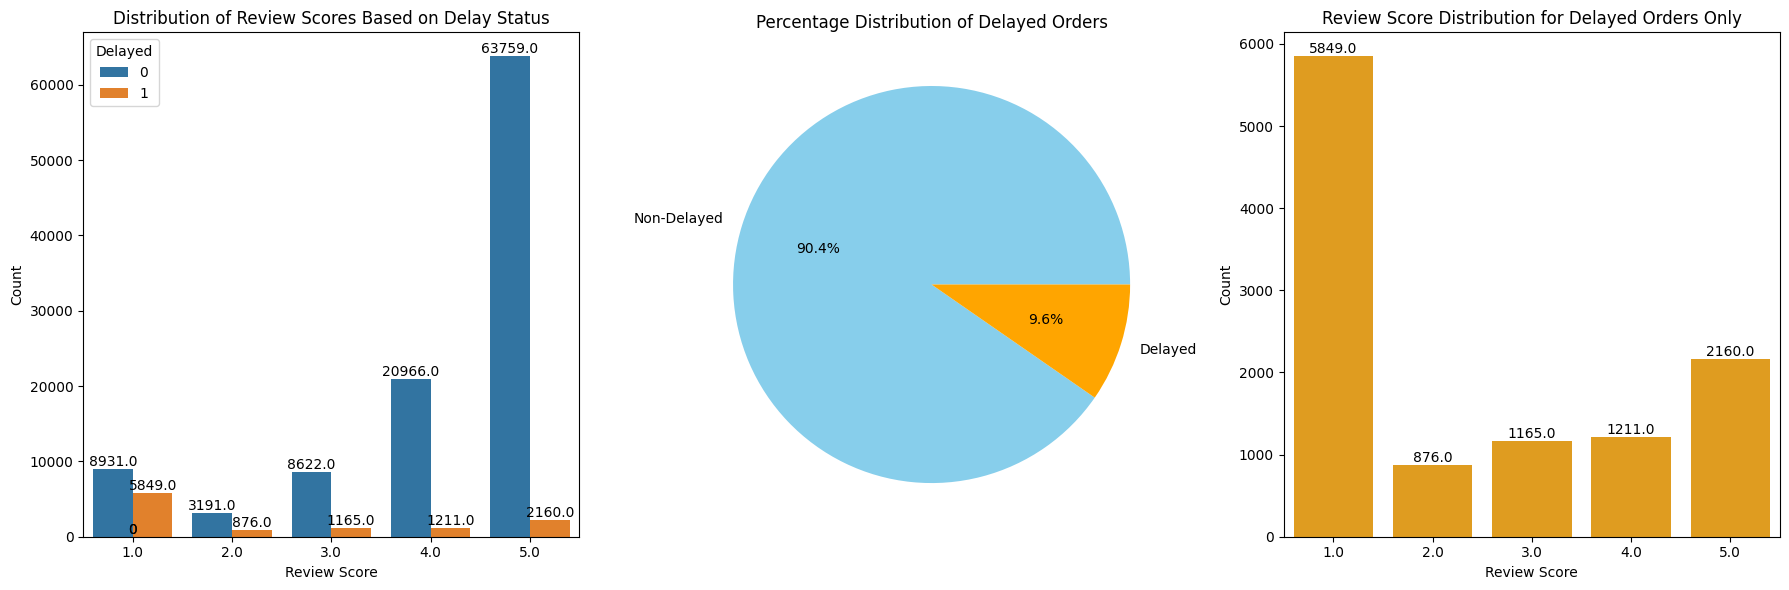

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Countplot of review scores based on delay status
sns.countplot(x='review_score', hue='Delayed', data=order_full, ax=axes[0])
axes[0].set_title('Distribution of Review Scores Based on Delay Status')
axes[0].set_xlabel('Review Score')
axes[0].set_ylabel('Count')

# Adding labels to Subplot 1
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Subplot 2: Pie chart of delayed vs non-delayed
delay_counts = order_full['Delayed'].value_counts()
axes[1].pie(delay_counts, labels=['Non-Delayed', 'Delayed'], autopct='%1.1f%%', colors=['skyblue', 'orange'])
axes[1].set_title('Percentage Distribution of Delayed Orders')

# Subplot 3: Review score distribution for delayed orders only
sns.countplot(x='review_score', data=order_full[order_full['Delayed'] == 1], color='orange', ax=axes[2])
axes[2].set_title('Review Score Distribution for Delayed Orders Only')
axes[2].set_xlabel('Review Score')
axes[2].set_ylabel('Count')

# Adding labels to Subplot 3
for p in axes[2].patches:
    height = p.get_height()
    axes[2].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()



## 1. Distribution of Review Scores Based on Delay Status

#### Analysis 1:
The distribution indicates that delayed orders overwhelmingly receive lower review scores. A disproportionate number of delayed orders fall into the 1- and 2-star range, suggesting that delays result in significant customer dissatisfaction. In contrast, non-delayed orders are concentrated in the 4- and 5-star ratings.

#### Analysis 2:
Interestingly, even within the 3-star reviews, there is a visible tilt toward delayed orders. This suggests that delays don’t just push reviews into the extremes of dissatisfaction; they also drag down neutral experiences, preventing customers from leaving more positive feedback.

#### Conclusion:
Delivery delays have a clear, strong impact on customer satisfaction. It’s not just about pushing ratings from good to bad but also pulling neutral or slightly positive experiences into lower score categories. The company’s delivery performance directly correlates with overall customer sentiment.

---

## 2. Percentage Distribution of Delayed Orders

#### Analysis 1:
Despite only 9.6% of orders being delayed, the negative impact on reviews is considerable. This demonstrates that even a small percentage of delayed deliveries can disproportionately harm the company's overall rating and reputation.

#### Analysis 2:
Given that the majority of orders are delivered on time, there is an opportunity to convert delayed customers into repeat clients if the right recovery strategies are in place. Customers who experience delays may be salvaged through post-delivery compensation or engagement.

#### Conclusion:
The relatively low percentage of delayed orders means that focusing on reducing this small but impactful group could yield substantial gains in customer satisfaction. The key is not only preventing delays but also mitigating the damage caused by the few that do occur.

---

## 3. Review Score Distribution for Delayed Orders Only

#### Analysis 1:
The review score distribution for delayed orders shows that a majority of customers give a score of 1 when faced with a delay. This suggests that customers are highly frustrated by delays, especially when there is no communication or resolution.

#### Analysis 2:
Lower scores tend to dominate when orders are delayed beyond a certain threshold (e.g., over 10 days), indicating that the length of the delay also plays a crucial role in customer dissatisfaction. Shorter delays (2-5 days) still tend to receive better scores, but long delays heavily skew toward poor reviews.

#### Conclusion:
Improving communication during delays and shortening long delays could help improve review scores. This also shows that not all delays are equally detrimental—customers seem to tolerate small delays but are much less forgiving of longer ones.

---

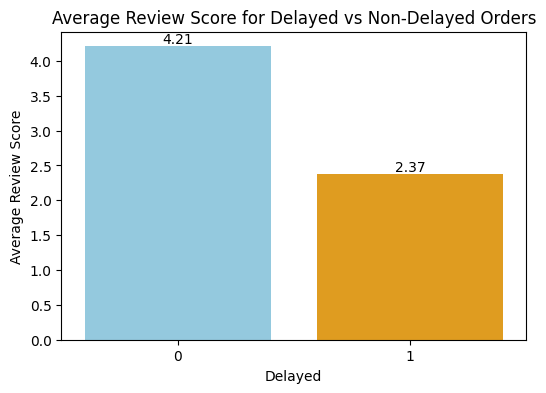

T-statistic: -144.71954289493704, P-value: 0.0
The difference in review scores between delayed and non-delayed orders is statistically significant.


In [24]:
# Grouping by Delayed status and calculating the average review score
avg_review_score = order_full.groupby('Delayed')['review_score'].mean().reset_index()

# Plotting the average review score for delayed and non-delayed orders
plt.figure(figsize=(6, 4))
sns.barplot(x='Delayed', y='review_score', data=avg_review_score, palette=['skyblue', 'orange'])
plt.title('Average Review Score for Delayed vs Non-Delayed Orders')
plt.xlabel('Delayed')
plt.ylabel('Average Review Score')

# Adding data labels
for index, value in enumerate(avg_review_score['review_score']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


# Splitting the data into delayed and non-delayed review scores
delayed_reviews = order_full[order_full['Delayed'] == 1]['review_score']
non_delayed_reviews = order_full[order_full['Delayed'] == 0]['review_score']

# Performing a t-test to check if the difference in average review scores is significant
t_stat, p_value = ttest_ind(delayed_reviews, non_delayed_reviews)

# Print the t-test results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Checking if the difference is significant at a 0.05 significance level
if p_value < 0.05:
    print("The difference in review scores between delayed and non-delayed orders is statistically significant.")
else:
    print("The difference in review scores between delayed and non-delayed orders is not statistically significant.")


## 4. Average Review Score for Delayed vs Non-Delayed Orders

#### Analysis 1:
The significant difference between the average review scores for delayed (2.37) and non-delayed (4.21) orders highlights how impactful delivery time is on customer satisfaction. Non-delayed orders consistently receive higher scores, showing that timely delivery significantly improves the customer experience.

#### Analysis 2:
This large gap between delayed and non-delayed orders suggests that customers are less forgiving when delays occur. Even minor delays can cause dissatisfaction, and the lower ratings reflect a loss of trust or frustration with the service when things go wrong.

#### Conclusion:
The difference in average review scores is clear evidence that improving delivery times will lead to higher customer satisfaction. Addressing these delays could push the average rating higher overall, with a direct correlation between better delivery times and more positive reviews.

---

In [25]:
# Calculate the median for the 'price' column
median_price = order_full['price'].median()
median_price

74.9

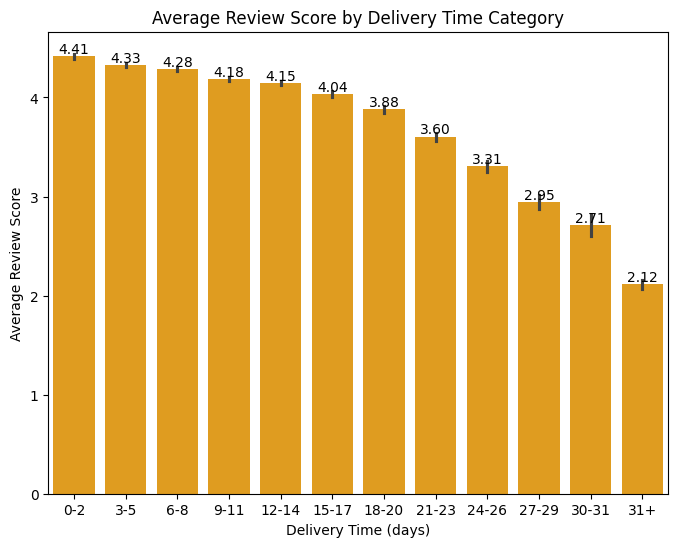

In [26]:
# Calculate delivery time in days (assuming you have these timestamp columns)
order_full['delivery_time_days'] = (pd.to_datetime(order_full['order_delivered_customer_date']) - 
                                    pd.to_datetime(order_full['order_purchase_timestamp'])).dt.days


# Binning the delivery time into specified categories (0-2, 3-5, etc.)
order_full['delivery_time_category'] = pd.cut(order_full['delivery_time_days'], 
                                              bins=[0, 2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 31, 50], 
                                              labels=['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23', '24-26', '27-29', '30-31', '31+'])

# Plotting average review score by delivery time category
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='delivery_time_category', y='review_score', data=order_full, color='orange')
plt.title('Average Review Score by Delivery Time Category')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Average Review Score')

# Adding labels to the bars
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.show()


In [27]:
order_full['delivery_time_category'].isna().count()

116730


## 5. Average Review Score by Delivery Time Category

#### Analysis 1:
The average review scores decline as delivery times increase, particularly after the 10-day mark. Orders delivered within 2-5 days tend to receive the best ratings, but after 21 days, the review scores drop sharply, falling below an average of 3 stars. This indicates that customers become significantly less satisfied as delivery times extend.

#### Analysis 2:
Even within the range of 6-10 days, the scores start to decline, showing that customers value faster delivery, but they seem to tolerate delays within a certain range. Beyond 20 days, the dissatisfaction is apparent, with the lowest average scores for the longest delivery times (31+ days). 

#### Conclusion:
Shorter delivery times (0-5 days) should be prioritized to maintain higher review scores, and the company should aim to avoid extended delays beyond 10 days as much as possible. Clear communication and setting customer expectations for longer deliveries could mitigate dissatisfaction in the cases where delays are unavoidable.

---

In [28]:
order_full.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'zip_code_prefix_x', 'lat_x', 'lng_x', 'product_category_name',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'zip_code_prefix_y', 'lat_y', 'lng_y',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_da

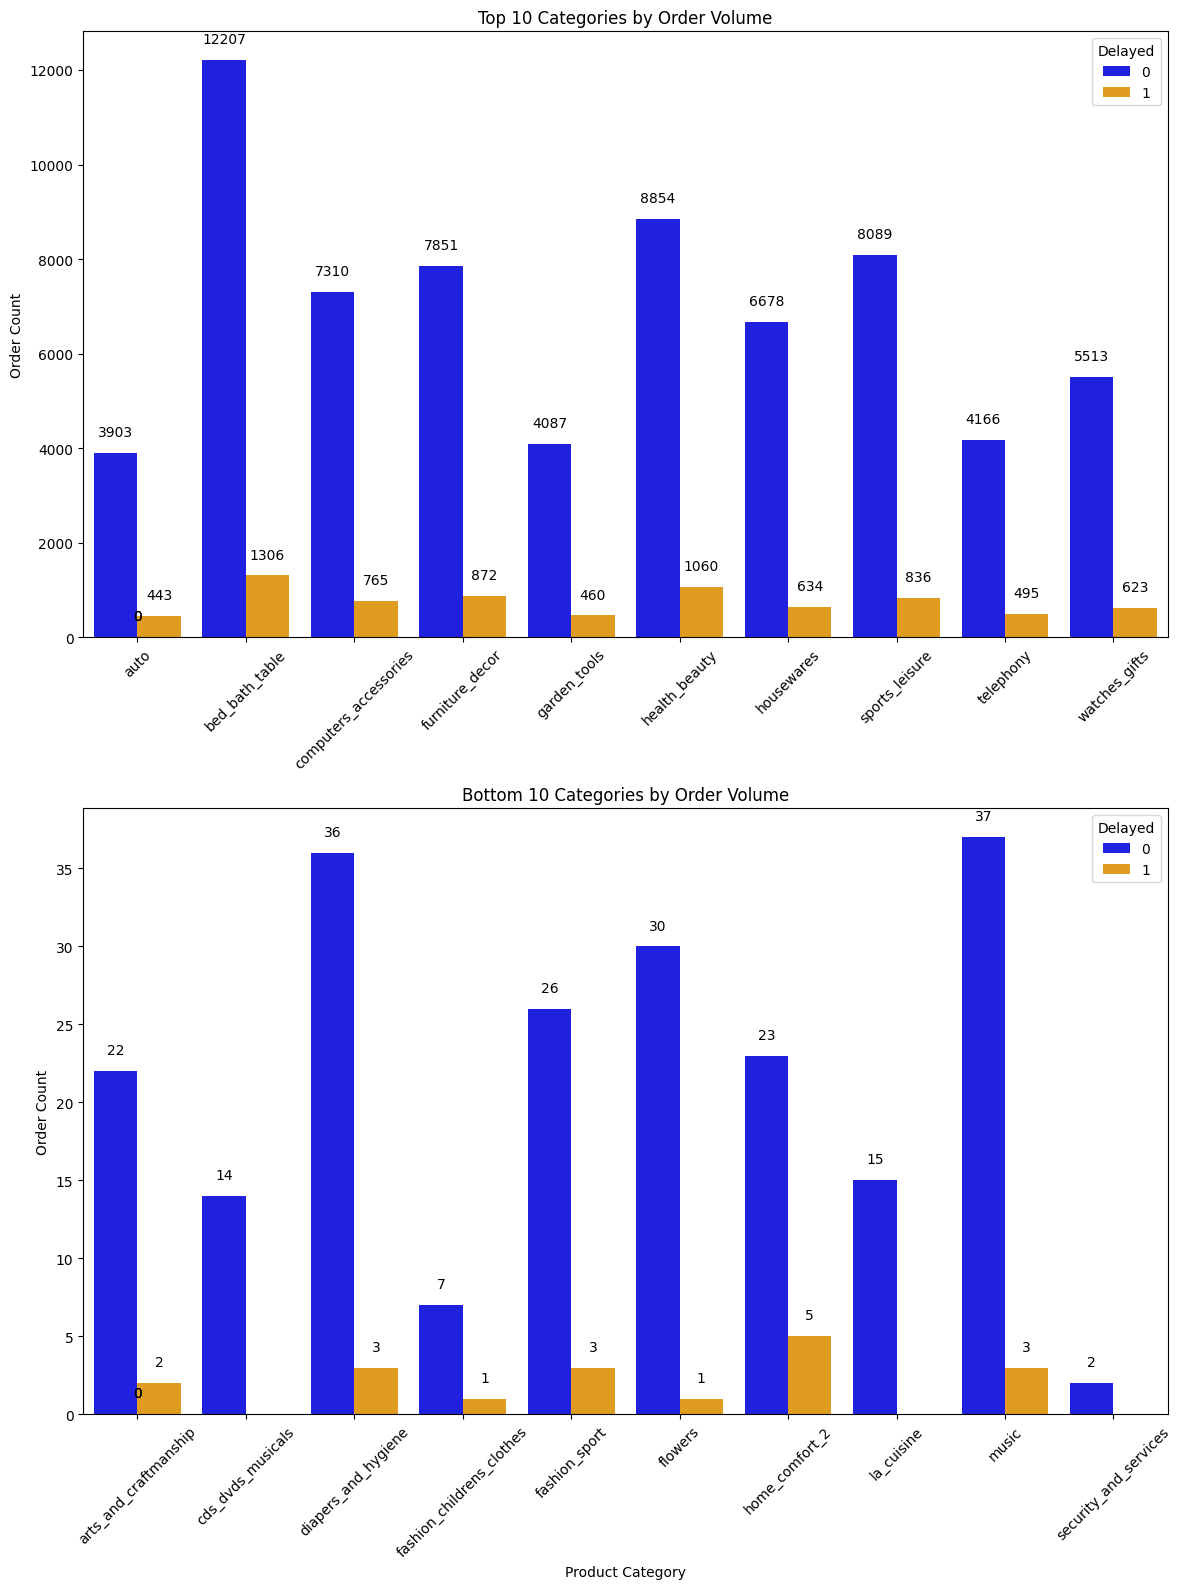

In [29]:
# Calculate total orders and delayed orders for each product category
category_summary = order_full.groupby(['product_category_name_english', 'Delayed']).agg(
    total_orders=('order_id', 'count')
).reset_index()

# Get the top 10 and bottom 10 product categories by total orders
top_categories = category_summary.groupby('product_category_name_english').sum().sort_values(by='total_orders', ascending=False).head(10).index
bottom_categories = category_summary.groupby('product_category_name_english').sum().sort_values(by='total_orders', ascending=False).tail(10).index

# Filter the data for top 10 and bottom 10 categories
top_categories_data = category_summary[category_summary['product_category_name_english'].isin(top_categories)]
bottom_categories_data = category_summary[category_summary['product_category_name_english'].isin(bottom_categories)]

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Top 10 Categories
sns.barplot(x='product_category_name_english', y='total_orders', hue='Delayed', palette={0: 'blue', 1: 'orange'}, data=top_categories_data, ax=axes[0])
axes[0].set_title('Top 10 Categories by Order Volume')
axes[0].set_ylabel('Order Count')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)
for p in axes[0].patches:
    axes[0].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', color='black', xytext=(0, 10), textcoords='offset points')

# Bottom 10 Categories
sns.barplot(x='product_category_name_english', y='total_orders', hue='Delayed', palette={0: 'blue', 1: 'orange'}, data=bottom_categories_data, ax=axes[1])
axes[1].set_title('Bottom 10 Categories by Order Volume')
axes[1].set_ylabel('Order Count')
axes[1].set_xlabel('Product Category')
axes[1].tick_params(axis='x', rotation=45)
for p in axes[1].patches:
    axes[1].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', color='black', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


## Top 10 Categories by Order Volume Analysis
### Analytical Points:
- High Volume with Minimal Delays: Categories like 'auto' and 'health_beauty' show significant order volumes with relatively fewer delays compared to other top categories. This could indicate efficient processing and delivery systems in these categories.

- Moderate Delays in Popular Categories: Categories like 'bed_bath_table' and 'housewares' exhibit moderate levels of delays despite high order volumes. This might suggest that while the logistics are generally efficient, there is room for improvement.

- Impact of Delays on Customer Experience: Even with relatively low delay rates, the absolute number of delayed orders in high-volume categories can impact a significant number of customers, potentially affecting customer satisfaction and retention.

### Conclusion:
The top categories mostly show efficient processing; however, even small percentages of delay in these high-volume categories can affect a large number of customers. Enhancing logistical efficiency in these areas could significantly improve overall customer experience.

### Recommended Action:
Enhance Forecasting and Inventory Management: For categories with higher delays, improve forecasting accuracy and inventory management to reduce out-of-stock situations and manage order surges effectively.

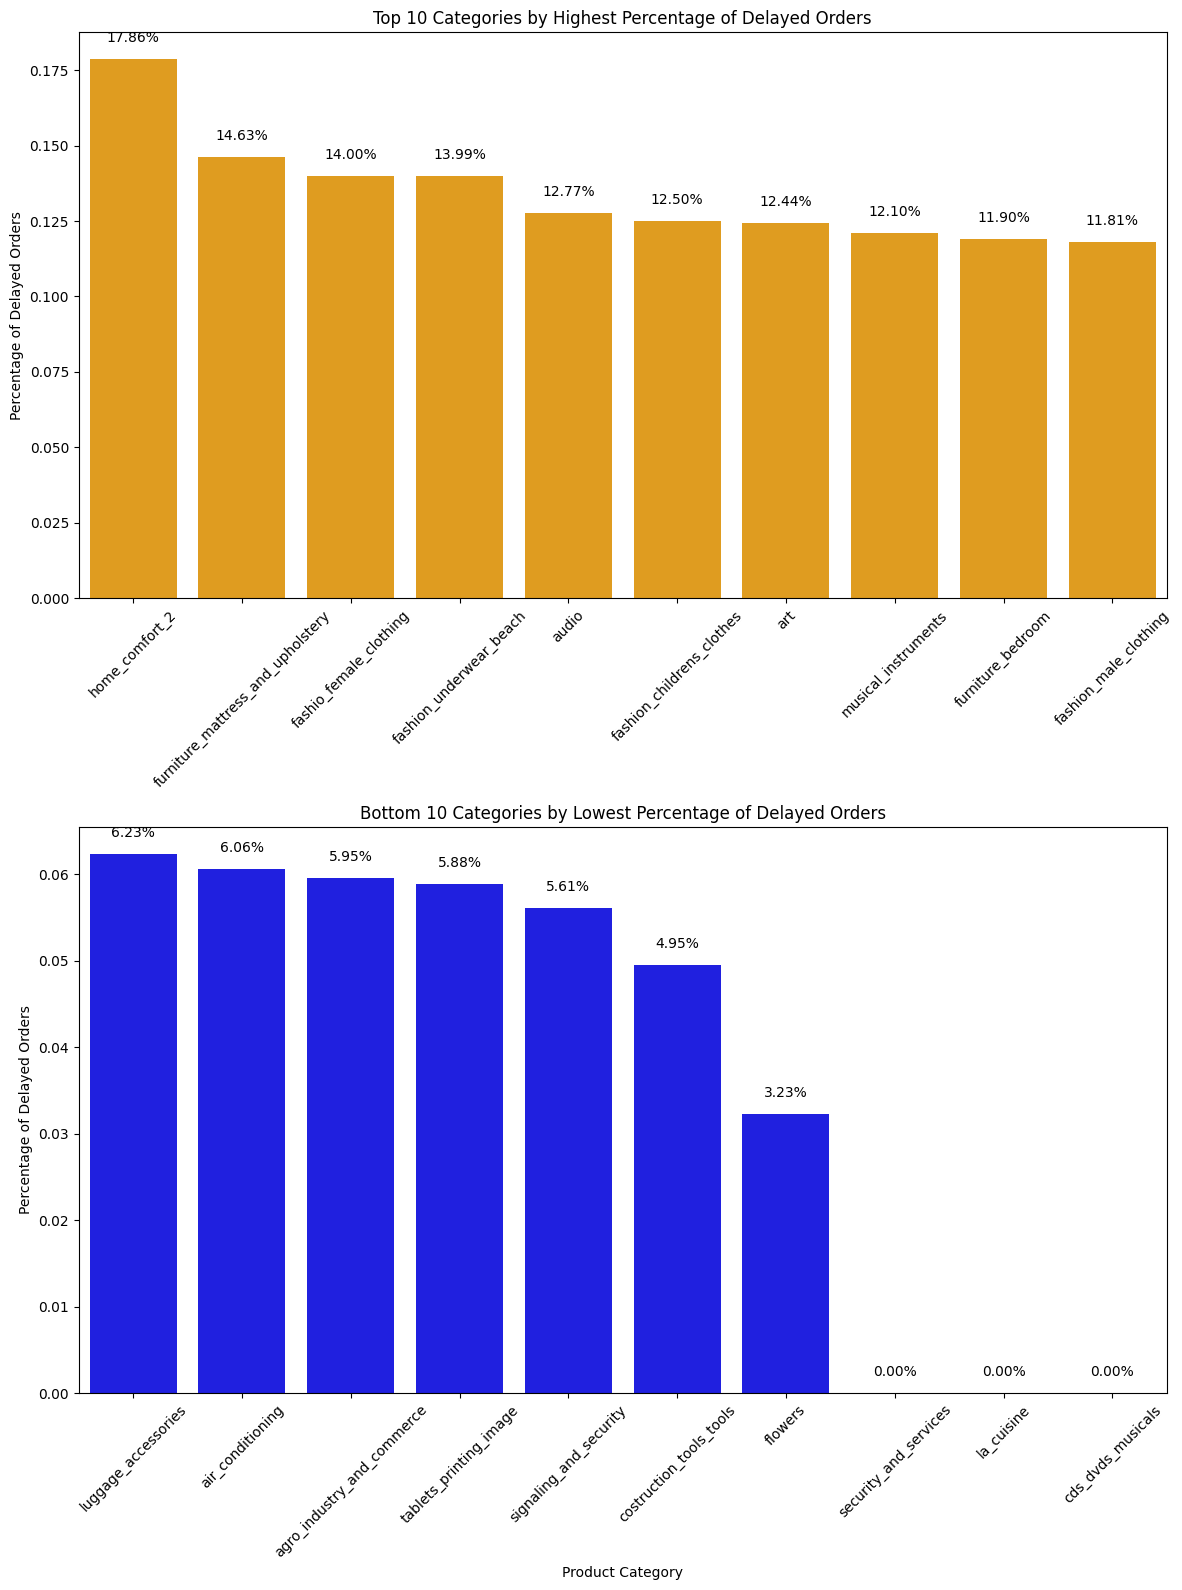

In [30]:
# Calculate total and delayed orders for each product category
category_summary = order_full.groupby(['product_category_name_english', 'Delayed']).agg(
    total_orders=('order_id', 'count')
).reset_index()

# Pivot the data to get non-delayed and delayed orders side by side
pivot_category_summary = category_summary.pivot(index='product_category_name_english', columns='Delayed', values='total_orders')
pivot_category_summary.columns = ['non_delayed', 'delayed']
pivot_category_summary.fillna(0, inplace=True)

# Calculate percentage of delayed orders
pivot_category_summary['percentage_delayed'] = pivot_category_summary['delayed'] / (pivot_category_summary['delayed'] + pivot_category_summary['non_delayed'])

# Sort categories by highest percentage of delays
sorted_categories = pivot_category_summary.sort_values(by='percentage_delayed', ascending=False)

# Select top 10 and bottom 10 categories based on the highest percentage of delayed orders
top10_percentage_delayed = sorted_categories.head(10)
bottom10_percentage_delayed = sorted_categories.tail(10)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Top 10 Categories by Highest Percentage of Delayed Orders
sns.barplot(x=top10_percentage_delayed.index, y='percentage_delayed', data=top10_percentage_delayed, ax=axes[0], color='orange')
axes[0].set_title('Top 10 Categories by Highest Percentage of Delayed Orders')
axes[0].set_ylabel('Percentage of Delayed Orders')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', color='black', xytext=(0, 10), textcoords='offset points')

# Bottom 10 Categories by Lowest Percentage of Delayed Orders
sns.barplot(x=bottom10_percentage_delayed.index, y='percentage_delayed', data=bottom10_percentage_delayed, ax=axes[1], color='blue')
axes[1].set_title('Bottom 10 Categories by Lowest Percentage of Delayed Orders')
axes[1].set_ylabel('Percentage of Delayed Orders')
axes[1].set_xlabel('Product Category')
axes[1].tick_params(axis='x', rotation=45)
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():.2%}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', color='black', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


## Top 10 Categories by Order Volume Analysis
### Analytical Points:
- High Volume with Minimal Delays: Categories like 'auto' and 'health_beauty' show significant order volumes with relatively fewer delays compared to other top categories. This could indicate efficient processing and delivery systems in these categories.

- Moderate Delays in Popular Categories: Categories like 'bed_bath_table' and 'housewares' exhibit moderate levels of delays despite high order volumes. This might suggest that while the logistics are generally efficient, there is room for improvement.

- Impact of Delays on Customer Experience: Even with relatively low delay rates, the absolute number of delayed orders in high-volume categories can impact a significant number of customers, potentially affecting customer satisfaction and retention.

### Conclusion:
The top categories mostly show efficient processing; however, even small percentages of delay in these high-volume categories can affect a large number of customers. Enhancing logistical efficiency in these areas could significantly improve overall customer experience.

### Recommended Action:
Enhance Forecasting and Inventory Management: For categories with higher delays, improve forecasting accuracy and inventory management to reduce out-of-stock situations and manage order surges effectively.


=============================================

## Bottom 10 Categories by Order Volume Analysis
### Analytical Points:
- Low Volume, High Delay Impact: Categories like 'cds_dvds_musicals' and 'la_cuisine' have low order volumes but a relatively high proportion of those orders are delayed. This could indicate specific challenges in handling niche products.

- Potential for Improvement in Niche Markets: The presence of delays in these smaller categories could be diminishing their growth potential. Addressing these issues could help in capturing a larger market share within these niches.

- Resource Allocation: Given their lower overall volume, the impact of improving these categories might offer a high return on investment in terms of customer satisfaction and operational efficiency, particularly if these categories carry higher margin products.

### Conclusion:
While the bottom categories contribute less to the overall volume, their delay rate is noticeable and could be disproportionately affecting customer perceptions and satisfaction. Improving operational efficiency in these categories could also lead to growth by enhancing customer trust and satisfaction in these niche markets.

### Recommended Action:
Targeted Logistics Improvements: Implement tailored logistical improvements or partner with specialized logistics providers who can handle the unique requirements of these products more effectively.

In [31]:
pivot_category_summary.sort_values('percentage_delayed', ascending=False)

,non_delayed,delayed,percentage_delayed
product_category_name_english,,,
home_comfort_2,23.0,5.0,0.178571
furniture_mattress_and_upholstery,35.0,6.0,0.146341
fashio_female_clothing,43.0,7.0,0.140000
fashion_underwear_beach,123.0,20.0,0.139860
audio,328.0,48.0,0.127660
...,...,...,...
costruction_tools_tools,96.0,5.0,0.049505
flowers,30.0,1.0,0.032258
security_and_services,2.0,0.0,0.000000


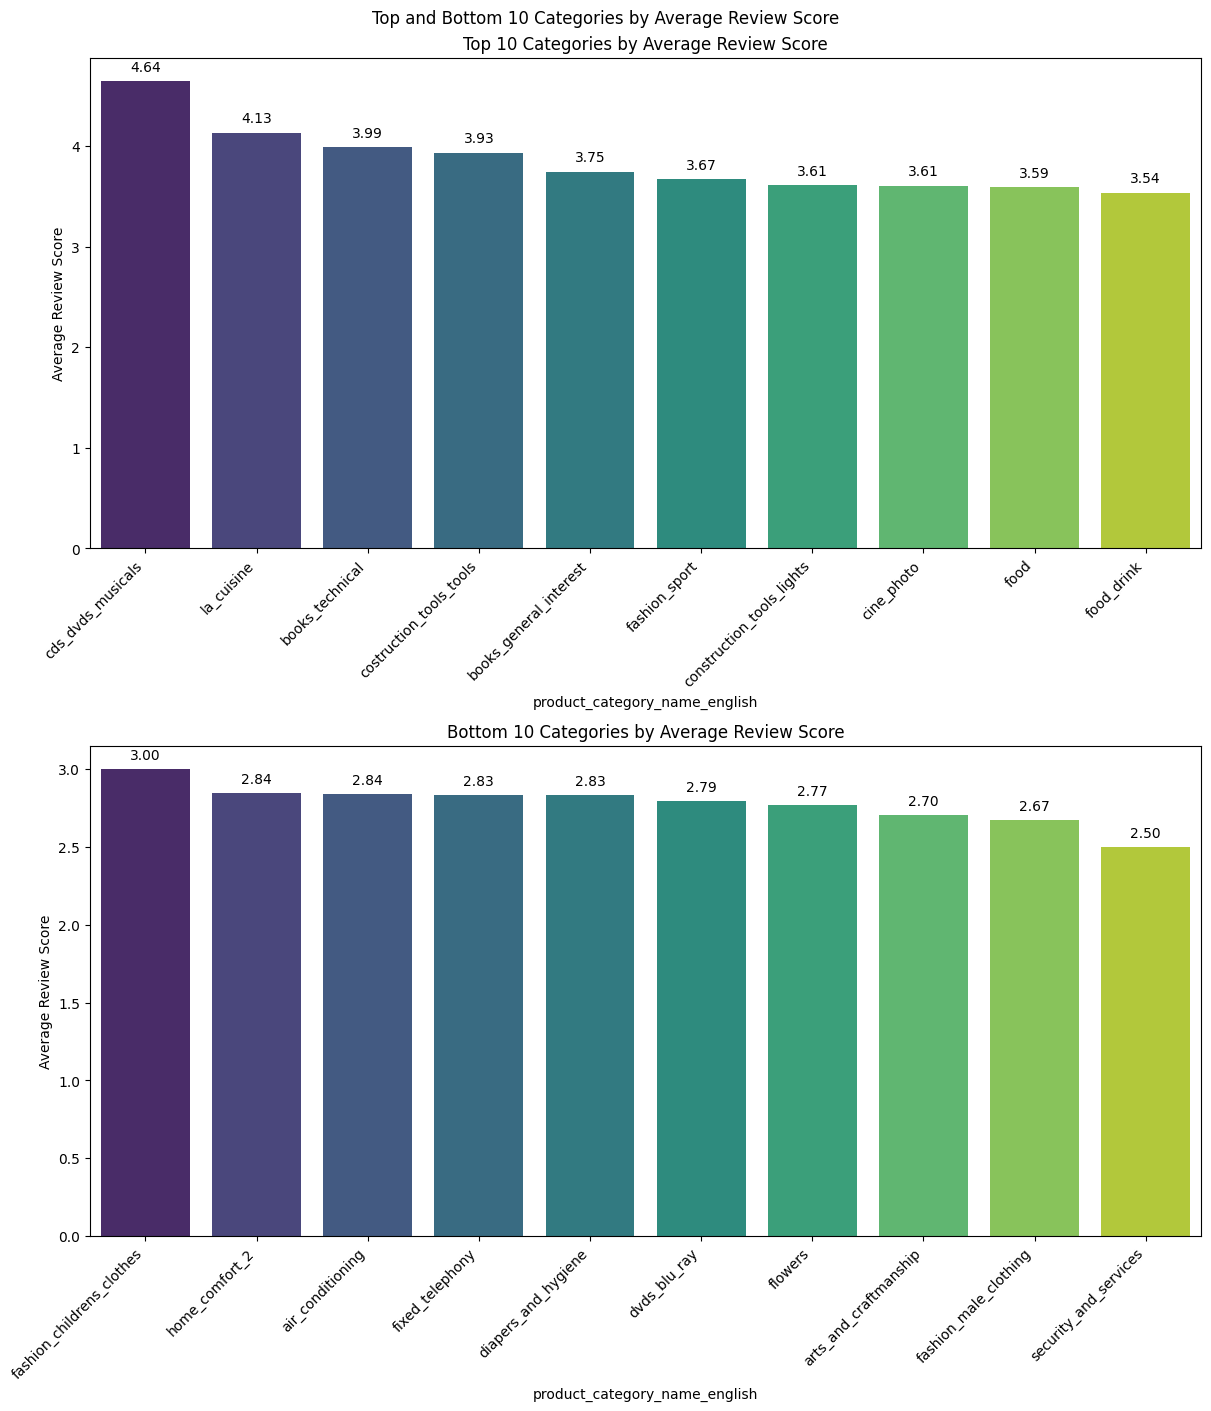

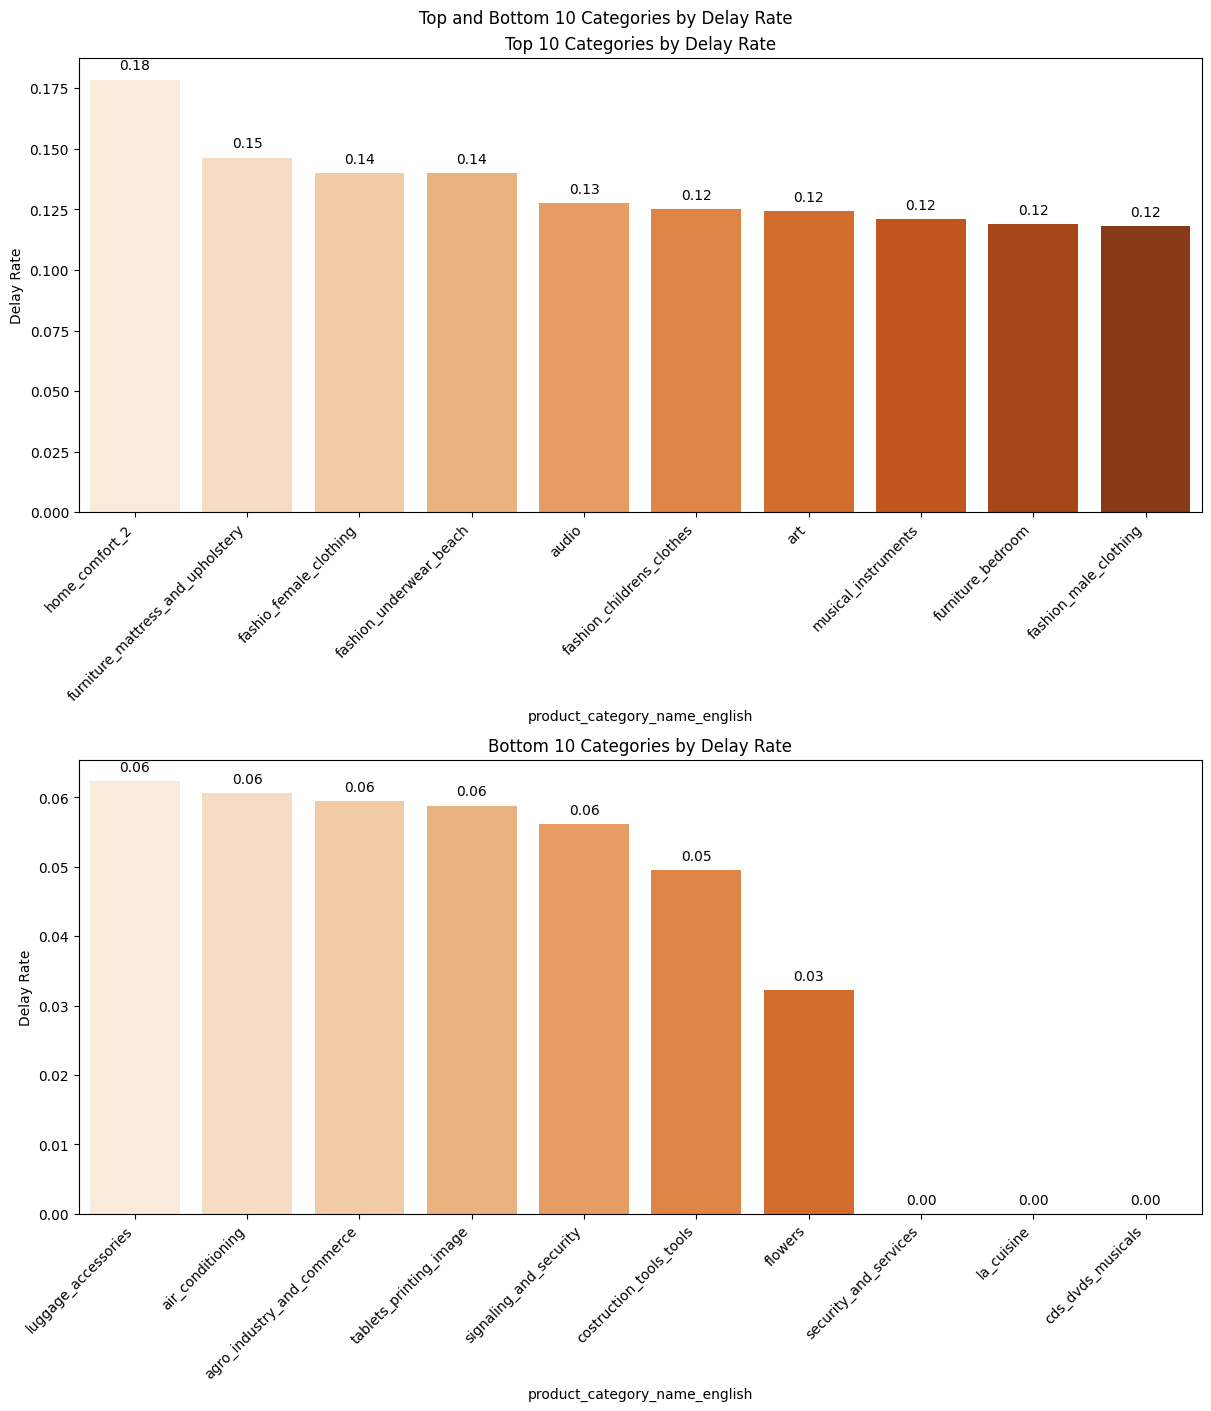

In [32]:
# Calculate average review scores for delayed and non-delayed orders by product category
avg_review_scores = order_full.groupby(['product_category_name_english', 'Delayed']).agg(
    average_review=('review_score', 'mean')
).reset_index()

# Get the overall average scores per category to sort by
overall_avg_scores = avg_review_scores.groupby('product_category_name_english').agg(
    overall_average=('average_review', 'mean')
).reset_index()

# Merge back to get sorting order
sorted_avg_reviews = pd.merge(avg_review_scores, overall_avg_scores, on='product_category_name_english')
sorted_avg_reviews.sort_values(by='overall_average', ascending=False, inplace=True)

# Get the top 10 and bottom 10 categories by average review scores
top_10_reviews = sorted_avg_reviews.drop_duplicates('product_category_name_english').head(10)
bottom_10_reviews = sorted_avg_reviews.drop_duplicates('product_category_name_english').tail(10)

# Calculate the delay rate for each category
delay_rates = order_full.groupby('product_category_name_english').agg(
    total_orders=('order_id', 'count'),
    delayed_orders=('Delayed', lambda x: (x==1).sum())
)
delay_rates['delay_rate'] = delay_rates['delayed_orders'] / delay_rates['total_orders']

# Get the top 10 and bottom 10 categories by highest delay rate
top_10_delays = delay_rates.sort_values(by='delay_rate', ascending=False).head(10)
bottom_10_delays = delay_rates.sort_values(by='delay_rate', ascending=False).tail(10)

# Plotting Top 10 and Bottom 10 Categories by Average Review Scores
fig, ax = plt.subplots(2, 1, figsize=(12, 14), constrained_layout=True)
fig.suptitle('Top and Bottom 10 Categories by Average Review Score')

# Top 10 by Average Review Score
sns.barplot(x='product_category_name_english', y='overall_average', data=top_10_reviews, ax=ax[0], palette='viridis')
ax[0].set_title('Top 10 Categories by Average Review Score')
ax[0].set_ylabel('Average Review Score')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')  # Rotate and adjust alignment for readability
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Bottom 10 by Average Review Score
sns.barplot(x='product_category_name_english', y='overall_average', data=bottom_10_reviews, ax=ax[1], palette='viridis')
ax[1].set_title('Bottom 10 Categories by Average Review Score')
ax[1].set_ylabel('Average Review Score')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')  # Rotate and adjust alignment for readability
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plotting Top 10 and Bottom 10 Categories by Delay Rate
fig, ax = plt.subplots(2, 1, figsize=(12, 14), constrained_layout=True)
fig.suptitle('Top and Bottom 10 Categories by Delay Rate')

# Top 10 by Delay Rate
sns.barplot(x=top_10_delays.index, y='delay_rate', data=top_10_delays, ax=ax[0], palette='Oranges')
ax[0].set_title('Top 10 Categories by Delay Rate')
ax[0].set_ylabel('Delay Rate')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')  # Rotate and adjust alignment for readability
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Bottom 10 by Delay Rate
sns.barplot(x=bottom_10_delays.index, y='delay_rate', data=bottom_10_delays, ax=ax[1], palette='Oranges')
ax[1].set_title('Bottom 10 Categories by Delay Rate')
ax[1].set_ylabel('Delay Rate')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')  # Rotate and adjust alignment for readability
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


## Product Category Review and Delay Rate Analysis

### Overview
This analysis examines the relationship between product categories, their average review scores, and delay rates. It aims to identify trends and outliers that may affect customer satisfaction and operational efficiency.

### Graph Analysis

#### Graph 1: Top and Bottom 10 Categories by Average Review Score

- **High Satisfaction Categories**: The top categories by average review score include `gifts musical`, `la cuisine`, and `books technical`, suggesting high customer satisfaction in these areas.
- **Low Satisfaction Categories**: At the other end, categories like `security services`, `fashion male clothing`, and `arts and craftsmanship` score the lowest, which could indicate issues with product quality, customer expectations, or service delivery.

#### Insights:
- High-scoring categories may benefit from positive customer perceptions and fewer complaints, whereas low-scoring categories might struggle with more frequent returns or negative feedback.

#### Recommendations:
- **Enhance Quality Control**: For low-scoring categories, review product quality control and customer service policies to address common complaints.
- **Promote High-Scoring Categories**: Leverage the high satisfaction in top categories for marketing campaigns to boost sales and improve brand image.

---

#### Graph 2: Top and Bottom 10 Categories by Delay Rate

- **Delay Challenges**: Categories such as `home comfort_2` and `furniture mattress and upholstery` show the highest delay rates, possibly due to logistical challenges or inventory issues.
- **Efficient Categories**: Conversely, categories like `la cuisine` and `books toys materials` have very low delay rates, indicating efficient processing and delivery systems.

#### Insights:
- High delay rates in specific categories could negatively impact customer satisfaction and lead to increased costs related to customer service and order management.

#### Recommendations:
- **Target Delay Reduction Initiatives**: Implement specific strategies such as better inventory management or optimized logistics for categories with high delay rates.
- **Benchmark Best Practices**: Analyze and replicate operational strategies from categories with low delay rates to improve performance across the board.

### Conclusion
Understanding the correlation between review scores and delay rates across product categories provides valuable insights into customer satisfaction and operational challenges. Addressing these issues proactively can lead to improved customer experiences and operational efficiencies. Strategic improvements in product quality, delivery systems, and customer communication based on these insights can significantly enhance overall business performance.


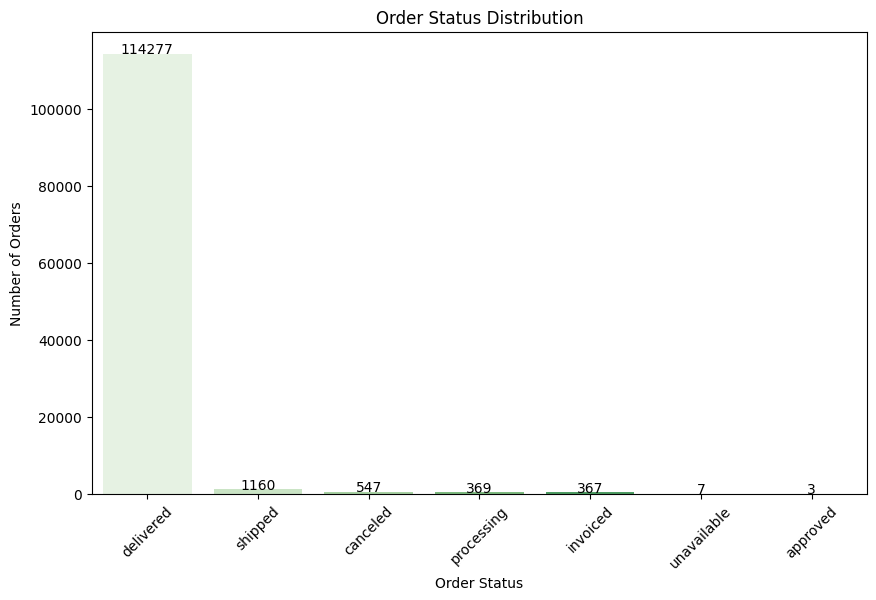

In [33]:
# Count the number of orders for each status
status_counts = order_full['order_status'].value_counts().reset_index()
status_counts.columns = ['order_status', 'count']

# Plotting order status distribution with green color
plt.figure(figsize=(10, 6))
sns.barplot(x='order_status', y='count', data=status_counts, palette='Greens')
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
for index, row in status_counts.iterrows():
    plt.text(index, row['count'], row['count'], color='black', ha="center")
plt.xticks(rotation=45)
plt.show()


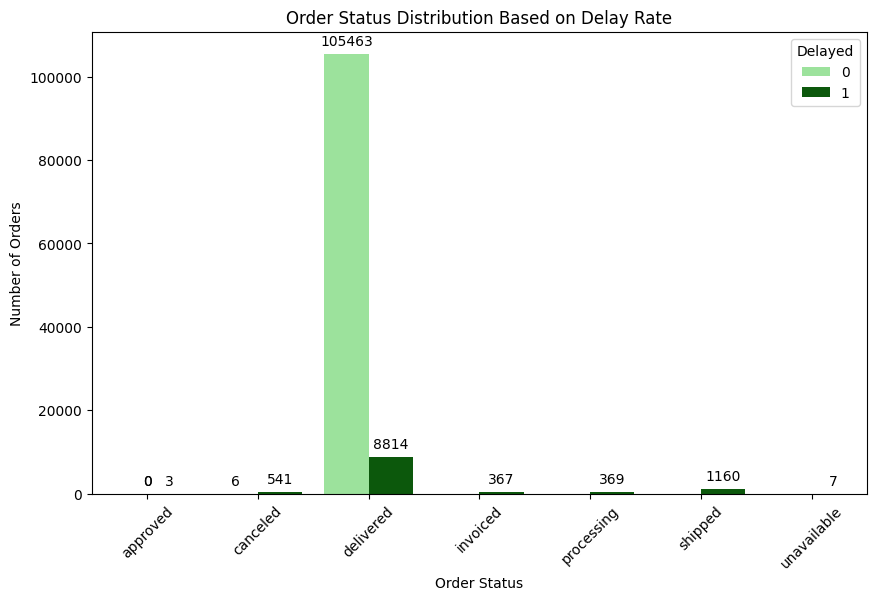

In [34]:
# 2) Order Status Distribution Based on Delay Rate

# Group by order status and delay status
status_delay_distribution = order_full.groupby(['order_status', 'Delayed']).size().reset_index(name='count')

# Plotting order status distribution based on delay rate with green colors
plt.figure(figsize=(10, 6))
sns.barplot(x='order_status', y='count', hue='Delayed', data=status_delay_distribution, palette={0: 'lightgreen', 1: 'darkgreen'})
plt.title('Order Status Distribution Based on Delay Rate')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.xticks(rotation=45)
plt.show()


## Order Status Distribution and Delay Analysis

### Overview
This analysis focuses on the distribution of different order statuses within the dataset and examines how each status correlates with delays in order processing and delivery. Understanding these patterns is crucial for identifying bottlenecks and improving overall efficiency.

### Graph Analysis

#### Graph 1: Order Status Distribution

- **Majority of Orders Delivered**: A vast majority of orders are marked as 'delivered', indicating effective completion of most transactions.
- **Minor Statuses**: Other statuses like 'shipped', 'canceled', 'processing', 'invoiced', 'unavailable', and 'approved' represent a small fraction of the total orders, suggesting most orders proceed to delivery without issue.

#### Insights:
- The high volume of delivered orders suggests efficient order processing under normal circumstances.

#### Recommendations:
- **Enhance Monitoring of Minor Statuses**: Focus on the statuses that represent operational bottlenecks (like 'processing' and 'invoiced') to improve speed and efficiency from order approval to delivery.

---

#### Graph 2: Order Status Distribution Based on Delay Status

- **Delays in 'Delivered' Status**: Even among orders marked as 'delivered', a significant number experienced delays, indicating potential issues in the delivery process that do not prevent completion but do affect timeliness.
- **Low Delays in Other Statuses**: Other statuses show relatively fewer delays, which might be due to the smaller number of orders in these categories or more stringent controls preventing progression to delivery until issues are resolved.

#### Insights:
- Delays predominantly affect the 'delivered' status but the impact on customer satisfaction and operational efficiency needs closer examination.

#### Recommendations:
- **Targeted Delay Reduction**: Implement targeted initiatives to reduce delays in the 'delivered' category, such as optimizing logistics, renegotiating with shipping partners, or enhancing internal workflow efficiency.
- **Proactive Communication**: Improve communication strategies to keep customers informed about the status of their orders, especially when delays are detected, to maintain trust and satisfaction.

### Conclusion
The analysis highlights a strong performance in moving orders to the 'delivered' status but also underscores a significant delay issue within this category. Addressing these delays through strategic operational adjustments and enhanced customer communication can lead to better service levels and improved customer experiences.


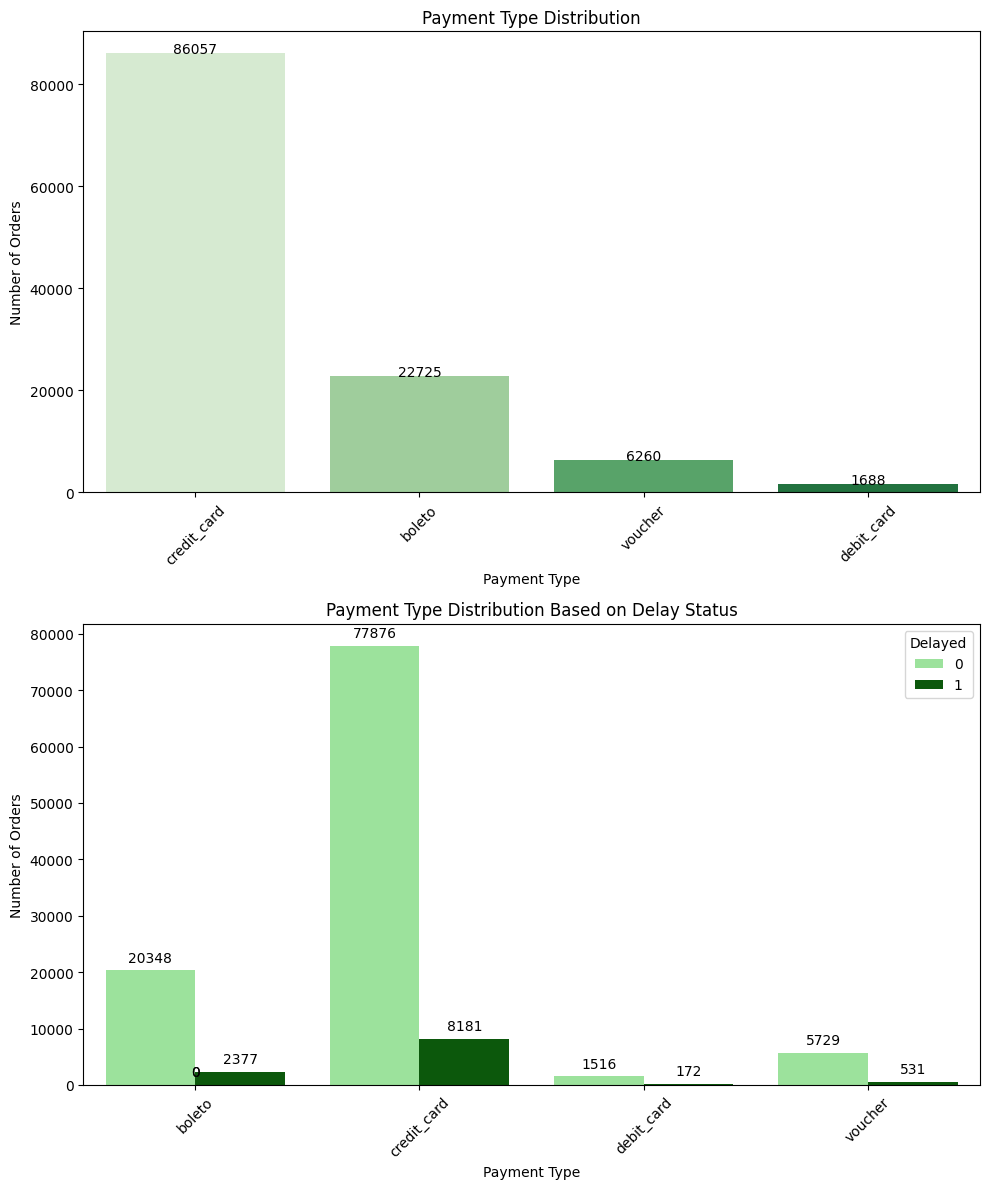

In [35]:
# 1) Payment Type Distribution
payment_type_counts = order_full['payment_type'].value_counts().reset_index()
payment_type_counts.columns = ['payment_type', 'count']

# 2) Payment Type Distribution Based on Delay
payment_type_delay_distribution = order_full.groupby(['payment_type', 'Delayed']).size().reset_index(name='count')

# Plotting both in two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# First subplot: Payment Type Distribution
sns.barplot(x='payment_type', y='count', data=payment_type_counts, palette='Greens', ax=ax[0])
ax[0].set_title('Payment Type Distribution')
ax[0].set_xlabel('Payment Type')
ax[0].set_ylabel('Number of Orders')
for index, row in payment_type_counts.iterrows():
    ax[0].text(index, row['count'], row['count'], color='black', ha="center")
ax[0].tick_params(axis='x', rotation=45)

# Second subplot: Payment Type Distribution Based on Delay Status
sns.barplot(x='payment_type', y='count', hue='Delayed', data=payment_type_delay_distribution, palette={0: 'lightgreen', 1: 'darkgreen'}, ax=ax[1])
ax[1].set_title('Payment Type Distribution Based on Delay Status')
ax[1].set_xlabel('Payment Type')
ax[1].set_ylabel('Number of Orders')
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Payment Type Analysis and Strategic Recommendations

### Overview
This analysis explores the distribution of payment types across orders and evaluates how these types correlate with order delays. The goal is to understand these dynamics to enhance payment processing and customer satisfaction.

### Graph Analysis

#### Graph 1: Payment Type Distribution

- **Credit Card Dominance**: Credit cards are the preferred method for the majority of transactions, suggesting high trust and convenience for credit card users.
- **Lesser-Used Methods**: Boleto and vouchers see significantly lesser use, with debit cards being the least popular.

#### Insights:
- Credit cards' dominance may be attributed to factors like ease of use, consumer protection, and rewards programs which may not be as compelling with other payment methods.

#### Recommendations:
- **Promote Underused Methods**: Improve incentives or features for using boleto and vouchers to diversify payment options and decrease dependency on credit cards.
- **Enhance Debit Card Transactions**: Streamline processes for debit card use to increase its attractiveness and utilization.

---

#### Graph 2: Payment Type Distribution Based on Delay Status

- **Payment Delays**: Credit cards, while most frequently used, also exhibit a significant number of delays. However, the impact of delays across different payment types shows that these issues are not exclusive to any particular method.
- **Relative Impact**: The actual impact of delays across different payment methods needs further investigation to understand if certain methods are more susceptible to delays or if operational issues uniformly affect all types.

#### Insights:
- The distribution of delays across payment types suggests that the root causes of delays might be more related to operational or logistical issues rather than the payment methods themselves.

#### Recommendations:
- **Operational Improvements**: Focus on enhancing operational efficiencies to reduce delays broadly across all payment types.
- **Proactive Customer Communication**: Improve communication with customers regarding expected delivery times, especially for orders that are identified early as likely to be delayed, regardless of payment type.



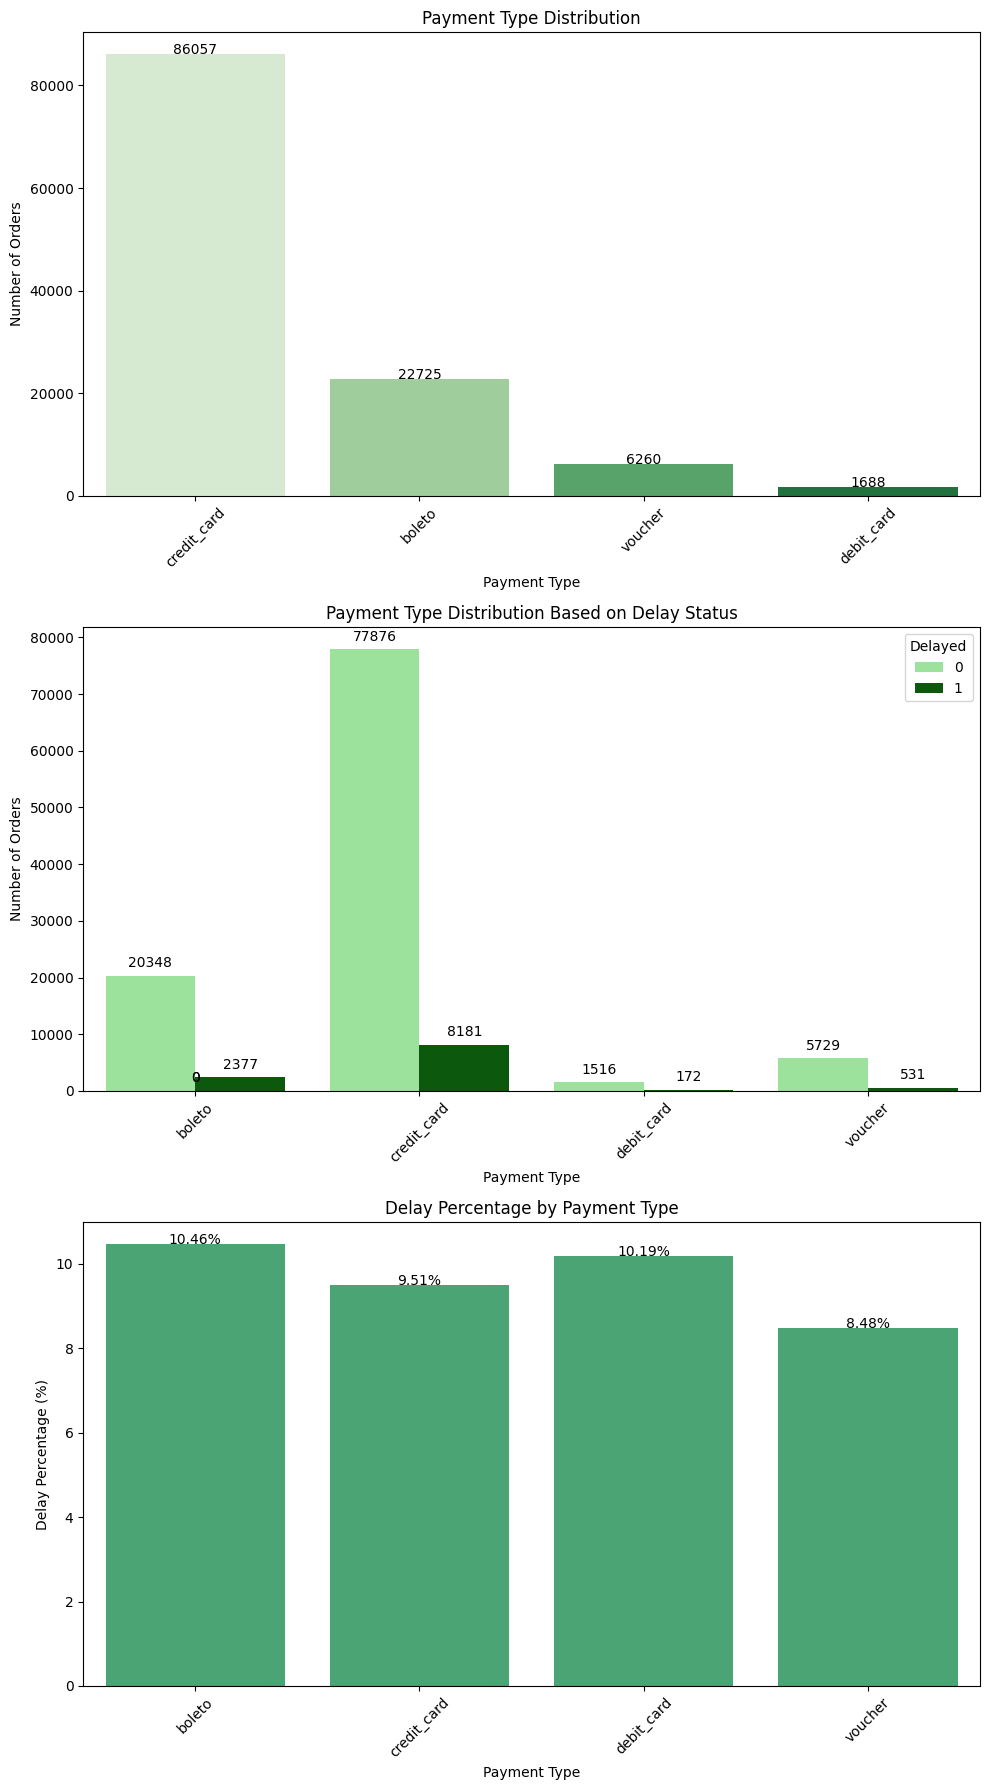

In [36]:
# Calculate the total orders and delayed orders by payment type
payment_type_totals = order_full.groupby('payment_type').size().reset_index(name='total')
payment_type_delays = order_full[order_full['Delayed'] == 1].groupby('payment_type').size().reset_index(name='delays')

# Merge the totals with delays
payment_type_delay_percentage = pd.merge(payment_type_totals, payment_type_delays, on='payment_type', how='left')
payment_type_delay_percentage['delays'].fillna(0, inplace=True)  # Replace NaN with 0 for types with no delays

# Calculate the percentage of delays
payment_type_delay_percentage['delay_percentage'] = payment_type_delay_percentage['delays'] / payment_type_delay_percentage['total'] * 100

# Update the plotting section to include three subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# First subplot: Payment Type Distribution
sns.barplot(x='payment_type', y='count', data=payment_type_counts, palette='Greens', ax=ax[0])
ax[0].set_title('Payment Type Distribution')
ax[0].set_xlabel('Payment Type')
ax[0].set_ylabel('Number of Orders')
for index, row in payment_type_counts.iterrows():
    ax[0].text(index, row['count'], row['count'], color='black', ha="center")
ax[0].tick_params(axis='x', rotation=45)

# Second subplot: Payment Type Distribution Based on Delay Status
sns.barplot(x='payment_type', y='count', hue='Delayed', data=payment_type_delay_distribution, palette={0: 'lightgreen', 1: 'darkgreen'}, ax=ax[1])
ax[1].set_title('Payment Type Distribution Based on Delay Status')
ax[1].set_xlabel('Payment Type')
ax[1].set_ylabel('Number of Orders')
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')
ax[1].tick_params(axis='x', rotation=45)

# Third subplot: Delay Percentage by Payment Type
sns.barplot(x='payment_type', y='delay_percentage', data=payment_type_delay_percentage, color='mediumseagreen', ax=ax[2])
ax[2].set_title('Delay Percentage by Payment Type')
ax[2].set_xlabel('Payment Type')
ax[2].set_ylabel('Delay Percentage (%)')
for index, row in payment_type_delay_percentage.iterrows():
    ax[2].text(index, row['delay_percentage'], f'{row["delay_percentage"]:.2f}%', color='black', ha="center")
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



## Analysis and Recommendations Based on Payment Type Data

### Graph 1: Payment Type Distribution

#### Analysis:
- **Credit Card Usage**: Credit cards are the most frequently used payment method, accounting for a large majority of orders. This prevalence suggests high trust and convenience associated with credit card transactions.
- **Lesser Used Methods**: Boleto and vouchers are significantly less used, with debit cards being the least popular among the provided data.

#### Conclusion:
- The dominance of credit cards could be attributed to factors like ease of use, potential rewards, and buyer protection policies that credit cards often offer.

#### Recommended Actions:
- **Promote Other Methods**: Enhance and promote the usage of debit cards and vouchers by introducing incentives or simplifying the transaction process.
- **Customer Feedback Evaluation**: Evaluate customer feedback specifically related to payment methods to understand any potential dissatisfaction or preference trends.

### Graph 2: Payment Type Distribution Based on Delay Status

#### Analysis:
- **Proportional Delays**: While credit cards have the highest number of orders, the proportion of delays across payment methods seems relatively even when considering the volume of transactions per type.
- **Debit Card Efficiency**: Debit cards show a notably lower delay rate compared to others, which could indicate a more streamlined processing or fewer complications with this payment method.

#### Conclusion:
- The delay rates are quite consistent across payment types, suggesting that delays might not be heavily influenced by the choice of payment method but rather by other logistic or supply chain issues.

#### Recommended Actions:
- **Systematic Inefficiencies**: Investigate specific reasons behind order delays irrespective of payment type to identify and mitigate systematic inefficiencies in order processing or delivery.
- **Communication Improvement**: Improve communication about expected delivery times at the point of purchase to manage customer expectations better, particularly for payment types prone to delays.

### Graph 3: Delay Percentage by Payment Type

#### Analysis:
- **Slight Variations in Delays**: The delay percentages for boleto and credit card are marginally higher than for debit card and voucher. This might be due to different processing times required before order confirmation.
- **Debit Card Processing Speed**: Debit card transactions, which often require immediate fund verification, exhibit slightly lower delay percentages, possibly reflecting faster order processing.

#### Conclusion:
- Minor differences in delay percentages by payment type could suggest a need for targeted improvements in processing times and order fulfillment practices.

#### Recommended Actions:
- **Optimize Processing Times**: Analyze and optimize processing times for each payment method to reduce overall delay rates and enhance customer satisfaction.
- **Targeted Customer Communication**: Implement targeted communication strategies for payment methods with higher delay rates to set realistic expectations and reduce customer dissatisfaction.


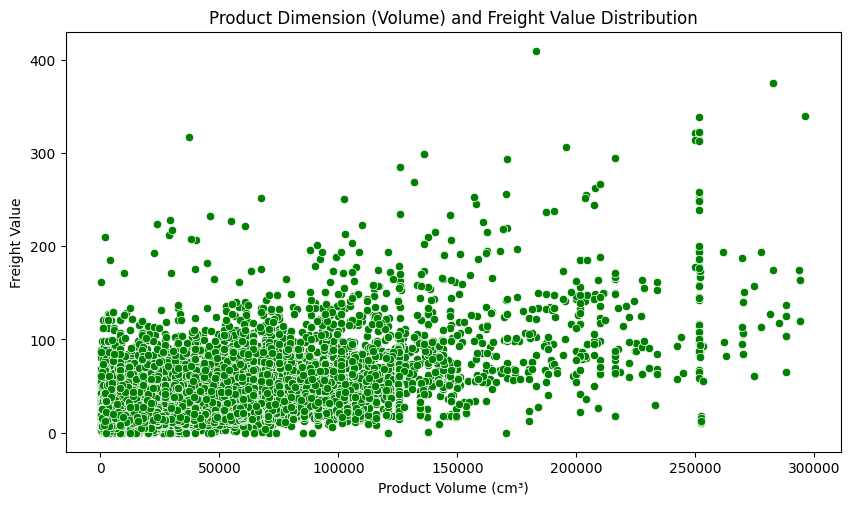

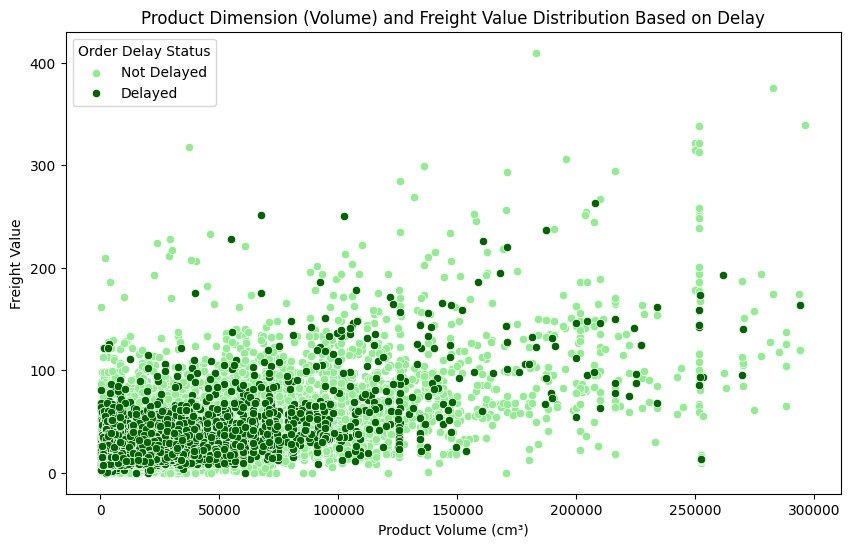

In [37]:
# Create a column for product volume
order_full['volume'] = order_full['product_length_cm'] * order_full['product_height_cm'] * order_full['product_width_cm']

# 1) Product Dimension and Freight Value Distribution
plt.figure(figsize=(10, 12))

# Subplot 1: Freight Value Distribution by Product Volume
plt.subplot(2, 1, 1)
sns.scatterplot(x='volume', y='freight_value', data=order_full, color='green')
plt.title('Product Dimension (Volume) and Freight Value Distribution')
plt.xlabel('Product Volume (cm³)')
plt.ylabel('Freight Value')

# 2) Product Dimension and Freight Value Distribution Based on Delay
# Ensure the 'volume' is calculated (if not already done)
order_full['volume'] = order_full['product_length_cm'] * order_full['product_height_cm'] * order_full['product_width_cm']

# Now plot the scatter plots for Product Dimension and Freight Value Distribution Based on Delay
plt.figure(figsize=(10, 6))

# Plot non-delayed orders first (light green)
sns.scatterplot(x='volume', y='freight_value', data=order_full[order_full['Delayed'] == 0], color='lightgreen', label='Not Delayed')

# Plot delayed orders on top (dark green)
sns.scatterplot(x='volume', y='freight_value', data=order_full[order_full['Delayed'] == 1], color='darkgreen', label='Delayed')

plt.title('Product Dimension (Volume) and Freight Value Distribution Based on Delay')
plt.xlabel('Product Volume (cm³)')
plt.ylabel('Freight Value')
plt.legend(title='Order Delay Status')
plt.show()

## Analytical Points:
- Volume to Freight Value Relationship: The scatter plots confirm a general trend that larger product volumes tend to have higher freight values. However, this relationship shows considerable variation, indicating that other factors like product type, packaging, or shipping distance may also significantly influence freight costs.

- Distribution of Delays: The second graph illustrates that delayed orders are not exclusively associated with higher product volumes or freight values. Delays occur across a wide range of volumes and freight values. Notably, higher freight values and larger volumes do not consistently predict a higher likelihood of delay.

- Density of Points: The high density of points at lower volumes and freight values suggests that most products shipped are smaller and less expensive to transport. Delayed orders are scattered throughout this range, emphasizing that operational inefficiencies may be widespread rather than isolated to specific types of shipments.

## Conclusions:
- Complex Influences on Freight Costs and Delays: The data suggests that while volume and freight costs are logically correlated, the impact on delays is less straightforward. This indicates that simple adjustments to shipping practices based on size or cost alone are unlikely to resolve delay issues.

- Broad Scope of Operational Challenges: Since delays are spread across various product sizes and shipping costs, this points to broader operational inefficiencies. These could include inventory management, shipping partner performance, route optimization, and handling times.

## Recommended Actions:
- Review Shipping Partners and Contracts: Analyze the performance of shipping partners to identify patterns of delays related to specific carriers or routes. Consider renegotiating terms or switching partners if certain thresholds of efficiency are not met.

- Enhance Inventory and Warehouse Management: Implement advanced inventory management systems that can predict and adjust stock levels dynamically to optimize order fulfillment times. Better warehouse practices can also reduce handling times, especially for larger or more complex products.

In [38]:
order_full.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'zip_code_prefix_x', 'lat_x', 'lng_x', 'product_category_name',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'zip_code_prefix_y', 'lat_y', 'lng_y',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_da

In [39]:
# Checking the minimum and maximum values for order_delivered_customer_date and order_estimated_delivery_date
max_min_dates = order_full[['order_delivered_customer_date', 'order_estimated_delivery_date']].agg(['min', 'max'])
max_min_dates

,order_delivered_customer_date,order_estimated_delivery_date
min,2016-10-11 13:46:32,2016-10-20
max,2018-10-17 13:22:46,2018-10-25


In [40]:
# Ensure the columns are in datetime format
order_full['order_delivered_customer_date'] = pd.to_datetime(order_full['order_delivered_customer_date'])

# For counting delays per month
delays_per_month = order_full[order_full['Delayed'] == 1].resample('M', on='order_delivered_customer_date').size().reset_index(name='delayed_count')

# For counting delays per 3 months (quarterly)
delays_per_quarter = order_full[order_full['Delayed'] == 1].resample('Q', on='order_delivered_customer_date').size().reset_index(name='delayed_count')


In [41]:
delays_per_quarter

,order_delivered_customer_date,delayed_count
0,2016-12-31,48
1,2017-03-31,213
2,2017-06-30,873
3,2017-09-30,806
4,2017-12-31,1799
5,2018-03-31,2891
6,2018-06-30,3187
7,2018-09-30,1441
8,2018-12-31,3


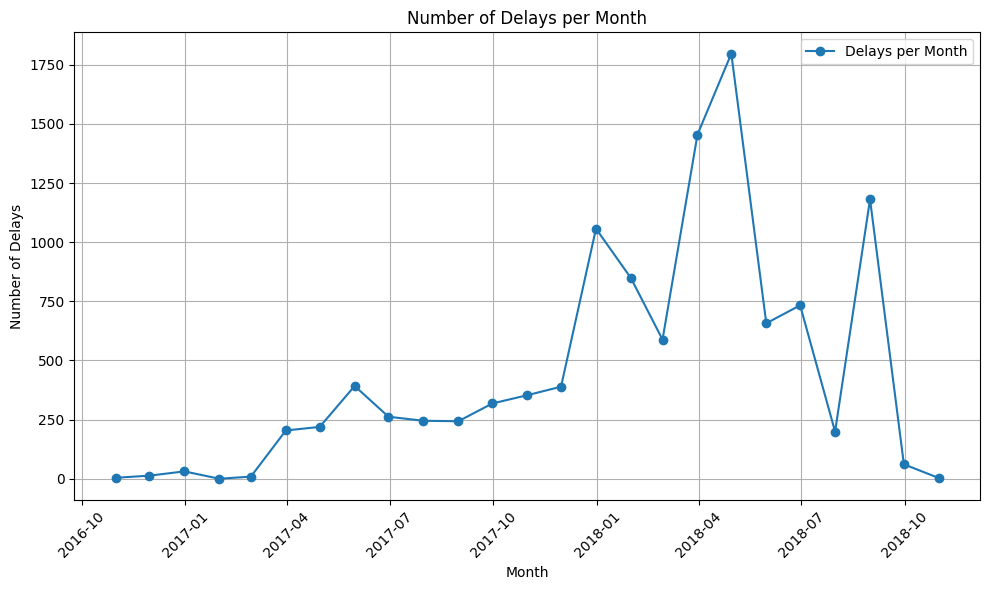

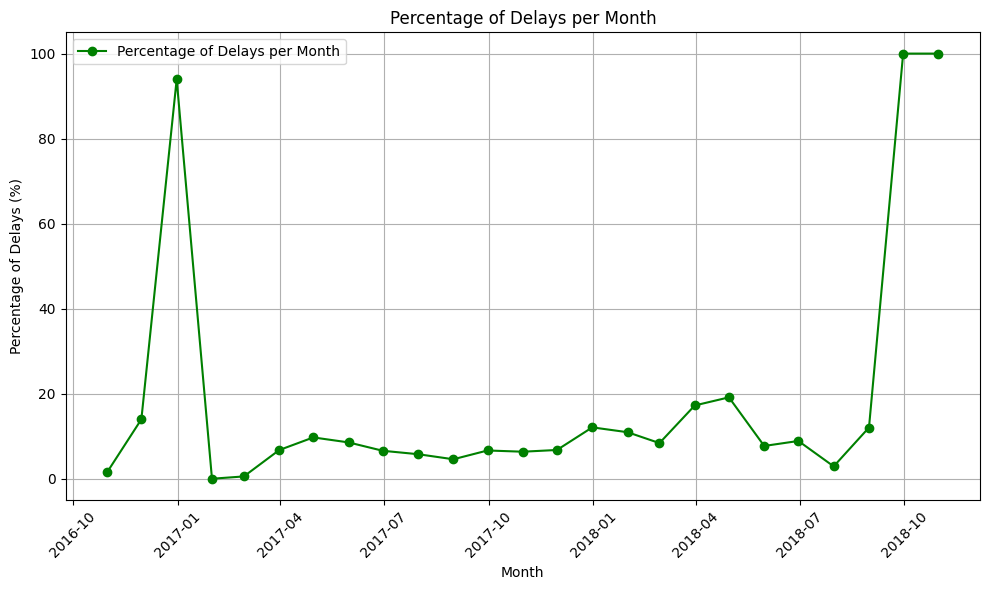

In [43]:
# First calculate the total orders per month
total_orders_per_month = order_full.resample('M', on='order_delivered_customer_date').size().reset_index(name='total_count')

# Merge total orders and delayed orders per month to calculate the percentage
delays_per_month = order_full[order_full['Delayed'] == 1].resample('M', on='order_delivered_customer_date').size().reset_index(name='delayed_count')
delays_per_month = delays_per_month.merge(total_orders_per_month, on='order_delivered_customer_date')

# Calculate the percentage of delays
delays_per_month['delay_percentage'] = (delays_per_month['delayed_count'] / delays_per_month['total_count']) * 100

# Plotting the number of delays per month
plt.figure(figsize=(10,6))
plt.plot(delays_per_month['order_delivered_customer_date'], delays_per_month['delayed_count'], marker='o', linestyle='-', label='Delays per Month')
plt.title('Number of Delays per Month')
plt.xlabel('Month')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Plotting the percentage of delays per month
plt.figure(figsize=(10,6))
plt.plot(delays_per_month['order_delivered_customer_date'], delays_per_month['delay_percentage'], marker='o', linestyle='-', label='Percentage of Delays per Month', color='green')
plt.title('Percentage of Delays per Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Delays (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## EDA and Analysis of Delays per Month

### 1. Data Overview

The provided data includes two charts representing the number of delays and the percentage of delays per month over a specific period. This analysis helps to identify trends, seasonal patterns, and potential anomalies in the dataset.

### 2. Key Observations

- **Number of Delays**: The first chart shows a significant increase in the absolute number of delays starting from mid-2017, with notable peaks in late 2017 and late 2018. These peaks might indicate seasonal effects or operational issues that occurred during these periods.

- **Percentage of Delays**: The second chart measures the percentage of delays relative to the total number of orders per month. There is a sharp peak in early 2017 and another in late 2018, suggesting that while the total number of orders might have been lower, a higher proportion were delayed.

### 3. Potential Causes for Fluctuations

- **Seasonal Demand**: Peaks during specific months might correspond to increased sales periods such as holidays or promotions, which could strain logistics and lead to higher delays.

- **Operational Changes**: Sudden spikes, especially in the percentage of delays, could also be due to changes in operational processes, supply chain issues, or shifts in management strategies.

### 4. Conclusion

The data suggests that while the total number of delays fluctuates, the proportion of delays shows critical peaks that may require further investigation. These findings indicate potential weaknesses in handling peak periods or operational inefficiencies.

### 5. Recommended Actions

- **Review and Optimize Supply Chain**: Analyze the supply chain and logistics operations during peak periods to identify and address bottlenecks.

- **Enhance Forecasting Models**: Improve demand forecasting to better prepare for increased order volumes and manage resources more efficiently.

- **Implement Process Improvements**: Consider adopting more robust process improvements or technology solutions to enhance order processing and delivery during high-demand periods.

- **Regular Monitoring**: Establish a regular monitoring system to quickly identify and respond to unusual increases in delay percentages, preventing potential impacts on customer satisfaction and operational efficiency.


In [44]:
delays_per_month

,order_delivered_customer_date,delayed_count,total_count,delay_percentage
0,2016-10-31,4,257,1.556420
1,2016-11-30,13,93,13.978495
2,2016-12-31,31,33,93.939394
3,2017-01-31,0,341,0.000000
4,2017-02-28,9,1668,0.539568
5,2017-03-31,204,3028,6.737120
6,2017-04-30,219,2254,9.716060
7,2017-05-31,392,4589,8.542166
8,2017-06-30,262,3985,6.574655
9,2017-07-31,245,4246,5.770137


# **CHAPTER 4: MACHINE LEARNING**

### Preprocessing Features to Boost Signal for Delayed Prediction

In this preprocessing step, we create several new features to improve the model's ability to predict whether an order is delayed (`Delayed` column). These features are derived from the existing data and represent important interactions and time-based behaviors relevant to the order fulfillment process.

#### 1. **Volume**
   - **Feature**: `volume`
   - **Description**: The volume of the product is calculated by multiplying the dimensions of the product (`length`, `width`, and `height` in centimeters). Larger or bulkier products may have different handling and shipping times, which can affect the likelihood of a delay.
   - **Formula**: 
     ```
     volume = product_length_cm × product_width_cm × product_height_cm
     ```

#### 2. **Delayed (Target)**
   - **Feature**: `Delayed`
   - **Description**: A binary target column created by comparing the actual delivery date with the estimated delivery date. If the order was delivered after the estimated delivery date, it is marked as delayed (`1`), otherwise, it is considered on time (`0`).
   - **Formula**:
     ```
     Delayed = (order_delivered_customer_date > order_estimated_delivery_date)
     ```

#### 3. **Price and Freight Interaction**
   - **Feature**: `price_freight_interaction`
   - **Description**: This feature captures the interaction between the product price and the freight (shipping) value. High shipping costs for low-value items or vice versa may indicate specific logistical challenges that could contribute to delays.
   - **Formula**:
     ```
     price_freight_interaction = price × freight_value
     ```

#### 4. **Volume and Freight Interaction**
   - **Feature**: `volume_freight_interaction`
   - **Description**: This feature reflects the interaction between the product volume and the freight value. Larger products that incur higher shipping costs may require additional logistics, potentially leading to delays.
   - **Formula**:
     ```
     volume_freight_interaction = volume × freight_value
     ```

#### 5. **Shipping Time Window**
   - **Feature**: `shipping_time_window`
   - **Description**: The time between the order purchase and the shipping limit date (the deadline for when the item should be shipped). A narrow shipping window could indicate a higher chance of delays, as there may be less buffer time for the shipping process.
   - **Formula**:
     ```
     shipping_time_window = (shipping_limit_date - order_purchase_timestamp).total_seconds() / 3600
     ```

#### 6. **Order Approval Delay**
   - **Feature**: `approval_delay`
   - **Description**: The time between when the order was placed and when it was approved. Delays in order approval could signal bottlenecks in the order processing system, which could increase the likelihood of late deliveries.
   - **Formula**:
     ```
     approval_delay = (order_approved_at - order_purchase_timestamp).total_seconds() / 3600
     ```

#### 7. **Order Day of the Week**
   - **Feature**: `order_day_of_week`
   - **Description**: This feature represents the day of the week when the order was placed. Orders placed on weekends or certain days might experience slower processing times, which could lead to delays.
   - **Formula**:
     ```
     order_day_of_week = order_purchase_timestamp.dayofweek
     ```

#### 8. **Is Weekend**
   - **Feature**: `is_weekend`
   - **Description**: A binary indicator of whether the order was placed on the weekend. Orders placed on the weekend (`Saturday` or `Sunday`) might have a higher chance of delay due to fewer working hours.
   - **Formula**:
     ```
     is_weekend = (order_day_of_week in [5, 6]).astype(int)
     ```

#### 9. **Freight to Price Ratio**
   - **Feature**: `freight_price_ratio`
   - **Description**: The ratio of freight cost to product price. A higher ratio may indicate disproportionately high shipping costs relative to the product price, which could signal potential logistical challenges or inefficiencies that could lead to delays.
   - **Formula**:
     ```
     freight_price_ratio = freight_value / price
     ```

#### 10. **Order Month**
   - **Feature**: `order_month`
   - **Description**: The month in which the order was placed. Seasonal effects could play a role in delivery delays, with certain months (like holidays) experiencing higher volumes of orders, which could lead to longer shipping times.
   - **Formula**:
     ```
     order_month = order_purchase_timestamp.month
     ```

#### 11. **Time Until Estimated Delivery**
   - **Feature**: `time_until_estimated_delivery`
   - **Description**: The time difference between the order purchase and the estimated delivery date. A shorter estimated delivery window might indicate a higher chance of delays if there is not enough time to accommodate shipping and delivery processes.
   - **Formula**:
     ```
     time_until_estimated_delivery = (order_estimated_delivery_date - order_purchase_timestamp).total_seconds() / 3600
     ```


In [45]:
# 1. Calculate Volume
order_full['volume'] = order_full['product_length_cm'] * order_full['product_width_cm'] * order_full['product_height_cm']

# Create 'Delayed' column based on whether the order was delivered after the estimated delivery date
order_full['Delayed'] = (order_full['order_delivered_customer_date'] > order_full['order_estimated_delivery_date']).astype(int)

# 2. Create Interaction Features
# Price and freight value interaction
order_full['price_freight_interaction'] = order_full['price'] * order_full['freight_value']

# Volume and freight value interaction
order_full['volume_freight_interaction'] = order_full['volume'] * order_full['freight_value']

# 3. Create Time-Based Features
# Shipping time window: Time between order purchase and shipping limit
order_full['shipping_time_window'] = (order_full['shipping_limit_date'] - order_full['order_purchase_timestamp']).dt.total_seconds() / 3600

# Order approval delay: Time between order purchase and approval
order_full['approval_delay'] = (order_full['order_approved_at'] - order_full['order_purchase_timestamp']).dt.total_seconds() / 3600

# Day of the week the order was placed
order_full['order_day_of_week'] = order_full['order_purchase_timestamp'].dt.dayofweek

# Is weekend feature
order_full['is_weekend'] = order_full['order_day_of_week'].isin([5, 6]).astype(int)

# 4. Other Features
# Freight to price ratio
order_full['freight_price_ratio'] = order_full['freight_value'] / order_full['price']

# Extract month from order purchase timestamp
order_full['order_month'] = order_full['order_purchase_timestamp'].dt.month

# Time until estimated delivery
order_full['time_until_estimated_delivery'] = (order_full['order_estimated_delivery_date'] - order_full['order_purchase_timestamp']).dt.total_seconds() / 3600
order_full

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,zip_code_prefix_x,lat_x,lng_x,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,zip_code_prefix_y,lat_y,lng_y,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,Delayed,delivery_time_days,delivery_time_category,volume,price_freight_interaction,volume_freight_interaction,shipping_time_window,approval_delay,order_day_of_week,is_weekend,freight_price_ratio,order_month,time_until_estimated_delivery
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,28013.0,-21.758679,-41.300239,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP,27277.0,-22.498183,-44.123614,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,Not given,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,0,7,6-8,3528.0,782.7810,46887.12,144.775833,0.775833,2,0,0.225637,9,375.016111
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,15775.0,-20.216537,-50.926688,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,3471,sao paulo,SP,3471.0,-23.563590,-46.515620,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,Not given,Not given,2017-05-13,2017-05-15 11:34:13,0,16,15-17,60000.0,4781.2070,1195800.00,168.201944,0.201944,2,0,0.083076,4,445.115000
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,35661.0,-19.918485,-44.600659,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,37564,borda da mata,MG,37564.0,-22.265723,-46.165525,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,Not given,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31,0,7,6-8,14157.0,3556.1300,252985.59,96.249722,0.249722,6,1,0.089799,1,513.441389
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,12952.0,-23.047478,-46.674795,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,14403,franca,SP,14403.0,-20.542234,-47.378964,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,Not given,Not given,2018-08-15,2018-08-15 16:39:01,0,6,6-8,2400.0,166.1421,30696.00,168.161944,0.161944,2,0,0.984604,8,277.990278
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03

### Calculating Distance Between Two Points (Haversine Formula)

In this section, we calculate the distance between two geographic coordinates (latitude and longitude) using the **Haversine formula**. The Haversine formula gives the great-circle distance between two points on the Earth, accounting for the Earth's curvature. The calculated distance is in kilometers.

#### 1. **Earth's Radius**
   - **Feature**: `R`
   - **Description**: We define the Earth's radius as 6371 kilometers. This value will be used in the Haversine formula to compute distances.
   - **Formula**: 
     ```
     R = 6371.0  # Earth's radius in kilometers
     ```

#### 2. **Convert Latitude and Longitude from Degrees to Radians**
   - **Feature**: `lat_x_rad`, `lng_x_rad`, `lat_y_rad`, `lng_y_rad`
   - **Description**: Latitude and longitude values are initially in degrees. To use the Haversine formula, these values need to be converted to radians using NumPy’s `radians` function. This step is necessary because trigonometric functions in Python expect inputs in radians.
   - **Formula**: 
     ```
     lat_x_rad = np.radians(lat_x)
     lng_x_rad = np.radians(lng_x)
     lat_y_rad = np.radians(lat_y)
     lng_y_rad = np.radians(lng_y)
     ```

#### 3. **Calculate Differences in Latitude and Longitude**
   - **Feature**: `dlat`, `dlng`
   - **Description**: Calculate the differences in latitude and longitude between the two points (`lat_x`, `lng_x` and `lat_y`, `lng_y`). These differences are used in the Haversine formula to compute the distance between the points.
   - **Formula**:
     ```
     dlat = lat_y_rad - lat_x_rad
     dlng = lng_y_rad - lng_x_rad
     ```

#### 4. **Haversine Formula**
   - **Feature**: `a` and `c`
   - **Description**: The Haversine formula calculates the great-circle distance between two points on a sphere, given their longitudes and latitudes. The formula involves trigonometric functions to compute the angular distance.
   
   - **Formula**:
     ```
     a = np.sin(dlat/2)^2 + np.cos(lat_x_rad) * np.cos(lat_y_rad) * np.sin(dlng/2)^2
     c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
     ```

#### 5. **Calculate Distance in Kilometers**
   - **Feature**: `distance_km`
   - **Description**: Finally, we calculate the distance between the two points in kilometers using the Haversine formula and multiply the result by the Earth’s radius (`R`).
   - **Formula**:
     ```
     distance_km = R * c  # Distance in kilometers
     ```

#### 6. **Drop Intermediate Columns**
   - **Description**: After calculating the distance, we drop intermediate columns (`lat_x_rad`, `lng_x_rad`, `lat_y_rad`, `lng_y_rad`, `dlat`, `dlng`) as they are no longer needed for further processing.

#### Example of the Distance Calculation:
After running this code, the `distance_km` column will store the calculated distances between the two geographic points (`lat_x`, `lng_x`) and (`lat_y`, `lng_y`) in kilometers.


In [46]:

# Earth's radius in kilometers (use 3958.8 for miles)
R = 6371.0

# Convert latitude and longitude from degrees to radians
order_full['lat_x_rad'] = np.radians(order_full['lat_x'])
order_full['lng_x_rad'] = np.radians(order_full['lng_x'])
order_full['lat_y_rad'] = np.radians(order_full['lat_y'])
order_full['lng_y_rad'] = np.radians(order_full['lng_y'])

# Calculate differences
order_full['dlat'] = order_full['lat_y_rad'] - order_full['lat_x_rad']
order_full['dlng'] = order_full['lng_y_rad'] - order_full['lng_x_rad']

# Haversine formula
a = np.sin(order_full['dlat']/2)**2 + np.cos(order_full['lat_x_rad']) * np.cos(order_full['lat_y_rad']) * np.sin(order_full['dlng']/2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

# Distance in kilometers
order_full['distance_km'] = R * c

# Drop intermediate columns if not needed
order_full.drop(columns=['lat_x_rad', 'lng_x_rad', 'lat_y_rad', 'lng_y_rad', 'dlat', 'dlng'], inplace=True)

# Check the new distance column
order_full[['lat_x', 'lng_x', 'lat_y', 'lng_y', 'distance_km']].head()

,lat_x,lng_x,lat_y,lng_y,distance_km
0,-21.758679,-41.300239,-22.498183,-44.123614,302.214941
1,-20.216537,-50.926688,-23.563590,-46.515620,587.836056
2,-19.918485,-44.600659,-22.265723,-46.165525,307.363930
3,-23.047478,-46.674795,-20.542234,-47.378964,287.899210
4,-23.249008,-46.835690,-22.927128,-53.148630,646.681165


### Removal of ID and Leakage-Prone Columns

In this step, we remove certain columns from the dataset to prevent **data leakage** and eliminate unnecessary identifiers. Data leakage occurs when information that would not be available at the time of prediction is used in the training process, leading to overly optimistic model performance.

#### 1. **ID Columns**
   - **Columns Removed**: `order_id`, `order_item_id`, `product_id`, `seller_id`, `customer_id`, `customer_unique_id`, `review_id`
   - **Reason for Removal**: These columns are unique identifiers for orders, products, sellers, and customers. They do not provide any meaningful information for predicting the `Delayed` variable, as they are not features that could influence shipping or order fulfillment. These are purely for tracking individual transactions and are not relevant for modeling purposes.

#### 2. **Leakage-Prone Columns**
   - **Columns Removed**: 
     - `order_delivered_carrier_date`: This column represents when the order was delivered to the carrier, which could indicate whether the order is delayed. Including this would cause data leakage, as this information would not be available at the time of predicting delays.
     - `order_delivered_customer_date`: This column shows the actual delivery date to the customer, which directly determines whether the order is delayed. Using this column would cause data leakage.
     - `review_comment_title`, `review_comment_message`: These columns represent customer reviews, which are often provided after the delivery is completed. Including them in the model could introduce data leakage, as reviews would only be available after the delivery.
     - `review_answer_timestamp`: This timestamp indicates when a response to a review was made, which would not be available until after the order is delivered.
     - `review_score`: Customer ratings could reflect their experience after receiving the order, making this information unavailable when predicting potential delays.

#### 3. **Why These Columns Are Removed**
   - **Preventing Data Leakage**: Columns such as delivery dates and review-related information are only known after the order has been processed or completed. Including these in the dataset during model training would artificially inflate the model’s accuracy, as it would be learning from information that wouldn't be available at the time of making real-time predictions.
   - **Removing IDs**: Unique identifiers such as `order_id`, `product_id`, or `customer_id` do not contain predictive information that could help the model, so removing them helps streamline the dataset without losing relevant information.

By removing these columns, we ensure that the model only learns from data that would be available at the time of making predictions, leading to more reliable and generalizable results.


In [47]:
# List of columns to remove (IDs and leakage-prone columns)
columns_to_remove = [
    'order_id', 'order_item_id', 'product_id', 'seller_id', 'customer_id', 
    'customer_unique_id', 'review_id', 'order_delivered_carrier_date', 
    'order_delivered_customer_date', 'review_comment_title', 
    'review_comment_message', 'review_answer_timestamp', 'review_score'
]

# Drop the identified columns
order_full_cleaned = order_full.drop(columns=columns_to_remove)

### Dropping Latitude, Longitude, and Timestamp Columns

In this step, we drop the latitude, longitude, and various timestamp columns that are either redundant or unnecessary for predicting delays.

#### 1. **Latitude and Longitude Columns**
   - **Columns Dropped**: `lat_x`, `lat_y`, `lng_x`, `lng_y`
   - **Reason for Removal**: The latitude and longitude columns represent the geographic coordinates of customers and sellers. Since we have already calculated the **distance** between the two points using the Haversine formula, the raw latitude and longitude values are no longer needed. Keeping only the calculated distance (`distance_km`) is sufficient for modeling.

#### 2. **Timestamp Columns**
   - **Columns Dropped**: 
     - `shipping_limit_date`: This column indicates the deadline for when the order should be shipped. This information has already been captured through the **shipping time window** feature, which calculates the time difference between the order purchase and shipping limit.
     - `order_purchase_timestamp`: The timestamp when the order was placed. Since we already derived features such as **order day of the week** and **is weekend** from this, the raw timestamp is no longer needed.
     - `order_approved_at`: The timestamp when the order was approved. The derived feature **approval delay** captures the time difference between order purchase and approval, making this timestamp redundant.
     - `order_estimated_delivery_date`: The estimated delivery date is directly related to the target feature `Delayed`. We’ve already used this column to calculate features like **time until estimated delivery**, so the raw timestamp can be dropped.

#### 3. **Review Creation Date**
   - **Column Dropped**: `review_creation_date`
   - **Reason for Removal**: This column represents when a customer review was created, which usually occurs after the order has been delivered. It is not useful for predicting delays and could potentially introduce data leakage, as reviews are typically based on the delivery experience itself.

#### Why These Columns Are Dropped:
- **Redundancy**: The latitude, longitude, and timestamp columns have been used to create more meaningful features (such as **distance**, **shipping time window**, **approval delay**, and **time until estimated delivery**), which capture the relevant information more effectively.
- **Preventing Data Leakage**: Certain columns, especially those related to reviews and timestamps that are generated post-delivery, are removed to avoid the risk of the model learning from information that wouldn’t be available at the time of prediction.
- **Simplicity**: Dropping these columns helps streamline the dataset, reducing unnecessary noise and focusing on features that are more likely to contribute to improving the model's performance.

By removing these columns, we ensure that the dataset is clean, free of redundant information, and optimized for modeling.


In [48]:
# List of columns to drop
columns_to_drop = [
    'lat_x', 'lat_y', 'lng_x', 'lng_y',  # Remove lat and lng columns
    'shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_estimated_delivery_date',  # Remove timestamps
    'review_creation_date'  # Remove review creation timestamp
]

# Drop the specified columns from the dataset
order_full_cleaned = order_full_cleaned.drop(columns=columns_to_drop)

order_full_cleaned.columns


Index(['price', 'freight_value', 'order_status', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'zip_code_prefix_x',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'zip_code_prefix_y',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'Delayed', 'delivery_time_days',
       'delivery_time_category', 'volume', 'price_freight_interaction',
       'volume_freight_interaction', 'shipping_time_window', 'approval_delay',
       'order_day_of_week', 'is_weekend', 'freight_price_ratio', 'order_month',
       'time_until_estimated_delivery', 'distance_km'],
      dtype='object')

### Variance Inflation Factor (VIF) Calculation

In this step, we calculate the **Variance Inflation Factor (VIF)** for each numerical feature in the dataset. VIF is a measure used to detect multicollinearity between features in a dataset. Multicollinearity occurs when one feature is highly linearly correlated with one or more other features. This can lead to problems in model interpretability and can affect the model's performance, especially for linear models.

#### What is Variance Inflation Factor (VIF)?

- **VIF** quantifies how much the variance of a regression coefficient is inflated due to collinearity with other predictors. A high VIF indicates that a feature is highly correlated with other features.
- VIF is calculated for each feature by regressing that feature against all other features. 
  
- **Threshold for VIF**:
  - **VIF = 1**: No correlation with other features.
  - **1 < VIF < 5**: Moderate correlation; generally acceptable.
  - **VIF > 5**: High multicollinearity; may need to consider removing or combining features.
  - **VIF > 10**: Very high multicollinearity; strong indication that a feature is redundant.

#### Why Are We Calculating VIF?

1. **Detecting Multicollinearity**: In this step, we calculate the VIF for each numerical feature in the dataset to check if there are features that are highly collinear. Features with high VIF values could negatively impact the performance of certain machine learning algorithms, especially those that assume independent features, such as **linear regression** and **logistic regression**.
   
2. **Improving Model Interpretability**: By identifying and addressing multicollinearity, we can improve the interpretability of the model. For example, if two features are highly correlated, it may be difficult to understand which one has a more significant impact on the target variable.

3. **Feature Selection**: Based on the VIF values, we can consider removing or combining features that have high VIF scores. This can help reduce redundancy and simplify the model.

#### Code Breakdown:

- **Step 1**: We import the required module to calculate VIF from `statsmodels`.
  ```python
  from statsmodels.stats.outliers_influence import variance_inflation_factor


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select numerical columns from the cleaned dataset
numerical_columns = order_full_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Prepare data for VIF calculation
X = order_full_cleaned[numerical_columns]

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display VIF values
vif_data

,Feature,VIF
0,price,5.902536
1,freight_value,12.106871
2,customer_zip_code_prefix,inf
3,zip_code_prefix_x,inf
4,product_name_length,14.528859
5,product_description_length,2.672333
6,product_photos_qty,2.724597
7,product_weight_g,4.416034
8,product_length_cm,7.853061
9,product_height_cm,6.755417


### Dropping High Variance Inflation Factor (VIF) Columns

In this step, we drop several columns from the dataset based on their **high VIF scores**. High VIF values indicate multicollinearity, meaning that these features are highly correlated with other features in the dataset. Keeping highly collinear features can negatively impact the model's performance, making it harder to interpret and potentially leading to overfitting.

#### 1. **Dropping ZIP Code Columns**
   - **Columns Dropped**: `customer_zip_code_prefix`, `zip_code_prefix_x`, `seller_zip_code_prefix`, `zip_code_prefix_y`
   - **Reason for Removal**: These ZIP code-related features have **infinite VIF values (`inf`)**, which means they are highly correlated with one another or with other variables in the dataset. ZIP codes do not provide much predictive power for delivery delays and can lead to multicollinearity problems, so we remove them to simplify the model.
   
   **VIF Values**:
   - `customer_zip_code_prefix`: `inf`
   - `zip_code_prefix_x`: `inf`
   - `seller_zip_code_prefix`: `inf`
   - `zip_code_prefix_y`: `inf`

#### 2. **Dropping Freight Value**
   - **Column Dropped**: `freight_value`
   - **Reason for Removal**: The **VIF value for `freight_value` is 12.11**, indicating high multicollinearity with other features, particularly with features such as `freight_price_ratio` and the interaction terms (`price_freight_interaction`, `volume_freight_interaction`). By dropping `freight_value`, we reduce redundancy, as its influence is already captured through these interaction features.
   
   **VIF Value**:
   - `freight_value`: 12.11

#### 3. **Dropping Product Name Length**
   - **Column Dropped**: `product_name_length`
   - **Reason for Removal**: The **VIF value for `product_name_length` is 14.53**, indicating that this feature is highly collinear with other features. This suggests that `product_name_length` does not add independent information to the model, and removing it can help simplify the dataset while preserving important features.
   
   **VIF Value**:
   - `product_name_length`: 14.53

#### Why We Drop These Columns:
- **High VIF Values**: Features with very high VIF values (especially above 10) are highly correlated with other variables, causing multicollinearity. This can make the model harder to interpret and potentially lead to overfitting.
- **Multicollinearity Reduction**: By dropping these features, we are reducing multicollinearity, which helps make the model more interpretable and ensures that the remaining features provide more unique, independent information.
- **Simplifying the Dataset**: Dropping redundant or collinear features helps streamline the dataset, making the modeling process more efficient and reducing the risk of overfitting.

By removing these columns, we improve the quality of the features used for modeling, ensuring better performance and interpretability.


In [50]:
order_full_cleaned = order_full_cleaned.drop(columns=[
    'customer_zip_code_prefix', 'zip_code_prefix_x', 'seller_zip_code_prefix', 'zip_code_prefix_y'
])

order_full_cleaned = order_full_cleaned.drop(columns=['freight_value'])

order_full_cleaned = order_full_cleaned.drop(columns=['product_name_length'])

### NExt, we keep checking for VIF and see if there's any other high VIF scores that indicate high multicolinearity

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select numerical columns from the updated dataset
numerical_columns = order_full_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Prepare data for VIF calculation
X = order_full_cleaned[numerical_columns].fillna(0)  # Fill missing values if needed

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display VIF values
vif_data


,Feature,VIF
0,price,5.850204
1,product_description_length,2.550832
2,product_photos_qty,2.532076
3,product_weight_g,3.897101
4,product_length_cm,7.148506
5,product_height_cm,5.899933
6,product_width_cm,8.143104
7,payment_sequential,3.055980
8,payment_installments,2.437335
9,payment_value,3.295008


### Dropping Features Based on High Variance Inflation Factor (VIF)

In this step, we drop the `volume` and `time_until_estimated_delivery` columns based on their **high VIF values**. High VIF values indicate multicollinearity, meaning that these features are highly correlated with other features in the dataset. Removing them helps reduce redundancy, leading to a more interpretable and efficient model.

#### 1. **Dropping Volume**
   - **Column Dropped**: `volume`
   - **Reason for Removal**: The **VIF value for `volume` is 12.18**, indicating that it is highly correlated with other features in the dataset, such as the dimensions of the product (`length`, `width`, `height`) and the `volume_freight_interaction` feature. Since the interaction terms already capture much of the relevant information regarding volume, we can safely remove this feature.
   
   **VIF Value**:
   - `volume`: 12.18

#### 2. **Dropping Time Until Estimated Delivery**
   - **Column Dropped**: `time_until_estimated_delivery`
   - **Reason for Removal**: The **VIF value for `time_until_estimated_delivery` is 11.11**, indicating multicollinearity with other time-based features, such as `delivery_time_days` and `shipping_time_window`. Since these features already capture the necessary information regarding delivery times, removing `time_until_estimated_delivery` simplifies the dataset without losing predictive power.
   
   **VIF Value**:
   - `time_until_estimated_delivery`: 11.11

#### Why These Columns Are Dropped:
- **High VIF Values**: Features with high VIF values (especially above 10) indicate multicollinearity, meaning they are highly correlated with other variables in the dataset. This can lead to issues in model interpretation and overfitting.
- **Redundancy**: Both the `volume` and `time_until_estimated_delivery` features provide information that is already captured by other features. For example, volume-related interactions and other time-based features can convey similar predictive signals.
- **Model Simplification**: Dropping these features reduces redundancy and makes the dataset more manageable, allowing the model to focus on the most important and independent features.

By removing these columns, we aim to improve the efficiency and interpretability of the model while maintaining high predictive performance.


In [52]:
# Drop 'volume' and 'time_until_estimated_delivery'
order_full_cleaned = order_full_cleaned.drop(columns=['volume', 'time_until_estimated_delivery', 'delivery_time_days'])

# Check the remaining columns
order_full_cleaned

,price,order_status,customer_city,customer_state,product_category_name,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,Delayed,delivery_time_category,price_freight_interaction,volume_freight_interaction,shipping_time_window,approval_delay,order_day_of_week,is_weekend,freight_price_ratio,order_month,distance_km
0,58.90,delivered,campos dos goytacazes,RJ,cool_stuff,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,volta redonda,SP,1.0,credit_card,2.0,72.19,0,6-8,782.7810,46887.12,144.775833,0.775833,2,0,0.225637,9,302.214941
1,239.90,delivered,santa fe do sul,SP,pet_shop,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,sao paulo,SP,1.0,credit_card,3.0,259.83,0,15-17,4781.2070,1195800.00,168.201944,0.201944,2,0,0.083076,4,587.836056
2,199.00,delivered,para de minas,MG,moveis_decoracao,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,borda da mata,MG,1.0,credit_card,5.0,216.87,0,6-8,3556.1300,252985.59,96.249722,0.249722,6,1,0.089799,1,307.363930
3,12.99,delivered,atibaia,SP,perfumaria,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,franca,SP,1.0,credit_card,2.0,25.78,0,6-8,166.1421,30696.00,168.161944,0.161944,2,0,0.984604,8,287.899210
4,199.90,delivered,varzea paulista,SP,ferramentas_jardim,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,loanda,PR,1.0,credit_card,3.0,218.04,0,24-26,3626.1860,761880.00,216.000000,0.206111,5,1,0.090745,2,646.681165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,299.99,delivered,sao luis,MA,utilidades_domesticas,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,itajai,SC,1.0,boleto,1.0,343.40,0,15-17,13022.5659,2318094.00,206.231944,38.231944,0,0,0.144705,4,2756.378289
118306,350.00,delivered,curitiba,PR,informatica_acessorios,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories,sao paulo,SP,1.0,boleto,1.0,386.53,0,9-11,12785.5000,1624123.80,138.083889,66.083889,5,1,0.104371,7,349.284965
118307,99.90,delivered,sao paulo,SP,esporte_lazer,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure,curitiba,PR,1.0,credit_card,3.0,116.85,0,3-5,1693.3050,162313.20,168.108056,24.108056,0,0,0.169670,10,339.080030
118308,55.99,delivered,vinhedo,SP,informatica_acessorios,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories,sao paulo,SP,1.0,credit_card,3.0,64.71,0,0-2,488.2328,69760.00,145.025833,1.025833,0,0,0.155742,8,72.584434


### Let's check the VIF for the last time. It looks alright now, no single VIF above 10. 

In [53]:
numerical_columns = order_full_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Prepare data for VIF calculation
X = order_full_cleaned[numerical_columns].fillna(0)  # Fill missing values if needed

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display VIF values
vif_data

,Feature,VIF
0,price,5.783494
1,product_description_length,2.463319
2,product_photos_qty,2.474757
3,product_weight_g,3.158494
4,product_length_cm,6.406185
5,product_height_cm,3.632589
6,product_width_cm,6.903399
7,payment_sequential,2.913449
8,payment_installments,2.363361
9,payment_value,3.282452


### Chi-Squared Test for Categorical Features and Correlation Analysis for Numerical Features

In this step, we perform two key analyses:
1. **Chi-Squared Test**: To evaluate the relationship between categorical features and the target variable `Delayed`.
2. **Correlation Analysis**: To check how numerical features correlate with `Delayed`.

#### 1. Chi-Squared Test for Categorical Features
- **Goal**: To determine whether categorical features significantly affect the `Delayed` variable.
- **Process**:
  - First, we encode each categorical feature using **Label Encoding** to convert them into numeric values.
  - Then, we apply the **Chi-Squared test** to evaluate the relationship between each categorical feature and the `Delayed` variable.
  - Features with a **p-value < 0.05** are considered statistically significant, meaning they have a relationship with the delay status.
  
- **Result**: The output is a DataFrame showing each categorical feature's **Chi-Squared statistic**, **p-value**, and whether it significantly affects delays.

#### 2. Correlation Analysis for Numerical Features
- **Goal**: To measure the correlation between each numerical feature and the target variable `Delayed`.
- **Process**:
  - We compute the **correlation coefficient** between each numerical feature and the `Delayed` variable.
  - The resulting value ranges from -1 to 1:
    - **1**: Strong positive correlation.
    - **-1**: Strong negative correlation.
    
    - **0**: No correlation.
    


In [54]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Separate categorical and numerical features
categorical_columns = order_full_cleaned.select_dtypes(include=['object', 'category']).columns
numerical_columns = order_full_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Ensure 'Delayed' is binary (if not already)
y = order_full_cleaned['Delayed']

# Step 2: Label encode the categorical columns
label_encoder = LabelEncoder()

chi2_results = []
for col in categorical_columns:
    # Label encode the categorical feature
    X_cat = label_encoder.fit_transform(order_full_cleaned[col])
    
    # Run Chi-squared test
    chi2_stat, p_val = chi2(X_cat.reshape(-1, 1), y)
    
    # Determine if the feature affects delays (p-value < 0.05)
    affects_delays = p_val[0] < 0.05
    
    # Append the results
    chi2_results.append([col, chi2_stat[0], p_val[0], affects_delays])

# Convert results to a DataFrame
chi2_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi2 Statistic', 'P-value', 'Affects Delays'])

# Step 3: Correlation analysis for numerical features
correlation_df = order_full_cleaned[numerical_columns].corrwith(order_full_cleaned['Delayed']).reset_index()
correlation_df.columns = ['Feature', 'Correlation with Delayed']

# Display results
from IPython.display import display
display(chi2_df)
display(correlation_df)

,Feature,Chi2 Statistic,P-value,Affects Delays
0,order_status,652.107620,7.775827e-144,True
1,customer_city,6116.770832,0.000000e+00,True
2,customer_state,789.719757,9.272332e-174,True
3,product_category_name,91.109972,1.359050e-21,True
4,product_category_name_english,19.344493,1.091335e-05,True
5,seller_city,2175.790929,0.000000e+00,True
6,seller_state,79.123685,5.834070e-19,True
7,payment_type,10.948880,9.366020e-04,True
8,delivery_time_category,106.471062,5.813526e-25,True


,Feature,Correlation with Delayed
0,price,0.030693
1,product_description_length,0.006483
2,product_photos_qty,-0.004933
3,product_weight_g,0.024887
4,product_length_cm,0.017223
5,product_height_cm,0.018188
6,product_width_cm,0.006638
7,payment_sequential,-0.000794
8,payment_installments,0.006654
9,payment_value,0.015049


### The result in teh chi2 square table shows that all categorical coloumns affect delays. The result in the Correlation shows most of the features does not have any linear relationtship with Delayed. 
#### **Hightest Correlation with Delayed**
- `price` with a score of 0.03
- `price_freight_interaction` with a score of 0.02
- `volume_freight_interaction` with a score of 0.02
- `approval_delay` witha score of 0.03
- `distance_km` with a score of 0.06

In [55]:
# Select only categorical columns
categorical_columns = order_full_cleaned.select_dtypes(include=['object', 'category']).columns

# Get the number of unique values in each categorical column
unique_values = order_full_cleaned[categorical_columns].nunique()

# Display the result
display(unique_values)

order_status                        7
customer_city                    4058
customer_state                     27
product_category_name              73
product_category_name_english      71
seller_city                       611
seller_state                       23
payment_type                        4
delivery_time_category             12
dtype: int64

### Preprocessing Pipeline for Categorical and Numerical Features

In this notebook, we set up a **preprocessing pipeline** to handle both categorical and numerical features before passing them into a machine learning model. Different encoding techniques are applied to categorical features, and numerical features are scaled to ensure consistency across features, improving model performance.

#### 1. **Categorical Features and Encoding**
We apply different encoding techniques based on the number of unique values in each categorical feature:

- **One-Hot Encoding**: Applied to the feature `payment_type` which has a low number of unique categories. This encoding method converts each unique category into a binary column. It's a suitable choice for categorical features with few unique values.
  
- **Binary Encoding**: Applied to features like `order_status`, `customer_state`, and `seller_state`. Binary encoding is used for categorical features with a moderate number of unique values. It represents categories in binary format, reducing the feature space compared to one-hot encoding.

- **Target Encoding**: Applied to high-cardinality features such as `customer_city`, `product_category_name`, and `seller_city`. This method replaces categories with the mean of the target variable (in this case, delay). Target encoding is useful for high-cardinality features as it reduces dimensionality while preserving relationships with the target variable.

#### 2. **Numerical Features and Scaling**
Numerical features (like `price`, `product_weight_g`, and `payment_value`) are scaled using **RobustScaler**. This scaler is used to normalize the features by removing the median and scaling them according to the interquartile range. The benefit of using **RobustScaler** is its ability to handle outliers in the data without being affected by extreme values.

#### 3. **Combining Preprocessing Steps**
The different preprocessing techniques are combined into a **ColumnTransformer**, ensuring that numerical features are scaled, and categorical features are encoded using their respective methods (one-hot, binary, or target encoding). This step prepares the dataset for the model by ensuring all features are transformed properly.

#### 4. **Pipeline with Logistic Regression**
After preprocessing, the transformed data is passed into a **Logistic Regression** model. The pipeline integrates the preprocessing step and model training into a single process, which simplifies and automates the workflow. The pipeline can be modified to use different classifiers, but Logistic Regression is used as an example in this case.

This pipeline ensures that the preprocessing steps are consistently applied across the dataset and makes it easier to manage both categorical and numerical features in a unified process.


In [56]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import BinaryEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Categorical columns based on unique values
onehot_columns = ['payment_type']
binary_columns = ['order_status', 'customer_state', 'seller_state']
target_columns = ['customer_city', 'product_category_name', 'product_category_name_english', 'seller_city']

# Numerical columns
numerical_columns = [
    'price', 'product_description_length', 'product_photos_qty', 'product_weight_g',
    'product_length_cm', 'product_height_cm', 'product_width_cm', 'payment_sequential',
    'payment_installments', 'payment_value', 'price_freight_interaction',
    'volume_freight_interaction', 'shipping_time_window', 'approval_delay', 
    'freight_price_ratio', 'distance_km'
]

# Preprocessing for numerical data (RobustScaler for scaling)
numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())  # Scaling numerical features with RobustScaler
])

# Preprocessing for categorical data
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding for low-cardinality categorical features
])

binary_transformer = Pipeline(steps=[
    ('binary', BinaryEncoder())  # Binary encoding for categorical columns with medium cardinality
])

target_transformer = Pipeline(steps=[
    ('target', TargetEncoder(smoothing=0.1))  # Target encoding with smoothing for high-cardinality features
])

# Combine preprocessing steps into a single pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('onehot', onehot_transformer, onehot_columns),
        ('binary', binary_transformer, binary_columns),
        ('target', target_transformer, target_columns)
    ]
)

# Example usage in a model pipeline (with LogisticRegression as an example)
from sklearn.linear_model import LogisticRegression

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply the preprocessor
    ('classifier', LogisticRegression())  # Replace with your preferred classifier
])


# Splitting & Train Test Split

First, the `train_test_split` function is imported from the `sklearn.model_selection` module. This function is essential for dividing arrays or matrices into random train and test subsets, which is crucial for evaluating the performance of machine learning models.

Next, the feature set `X` is defined by dropping the target column `'Delayed'` from the `order_full_cleaned` DataFrame, ensuring that only the input features are included for model training. The target variable `y` is then defined as the `'Delayed'` column, which indicates whether an order is delayed (the positive class) or on time (the negative class).

Following this, the dataset is split into training and testing sets using the `train_test_split` function. The parameters used for this function include `X`, the feature set; `y`, the target variable; `test_size=0.2`, which specifies that 20% of the data will be allocated for testing while the remaining 80% will be used for training; `random_state=42`, which serves as a seed value for the random number generator to ensure reproducibility; and `stratify=y`, which maintains the same proportion of classes in the target variable as in the original dataset, ensuring that both training and testing sets accurately represent the target variable's distribution.

The resulting variables are `X_train`, `X_test`, `y_train`, and `y_test`, which contain the training features, testing features, training target variable, and testing target variable, respectively. Overall, this code effectively prepares the dataset for model training and evaluation, ensuring that the training and testing sets are representative of the original data.


In [57]:
from sklearn.model_selection import train_test_split

# Define X and y (assuming 'Delayed' is your target column)
X = order_full_cleaned.drop(columns=['Delayed'])  # All features except the target
y = order_full_cleaned['Delayed']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Benchmarking and Cross Validatoin

In this code, we evaluate multiple machine learning models using the Cluster Centroid undersampling technique to address class imbalance. We start by importing the necessary libraries, including classifiers from `sklearn`, evaluation metrics, and the `Pipeline` class from `imblearn`.

First, we define a cross-validation strategy using `StratifiedKFold` with 5 splits, ensuring that the class distribution in each fold remains consistent with the original dataset. This is important for maintaining the integrity of our model evaluation, especially when dealing with imbalanced datasets.

Next, we create a dictionary named `scoring` that specifies the evaluation metric we will use, which is recall. Recall is particularly important for our analysis as it measures the model's ability to correctly identify positive instances (e.g., delayed orders).

We then define a list of models that we want to evaluate, including `DecisionTreeClassifier`, `RandomForestClassifier`, `LogisticRegression`, and `GradientBoostingClassifier`. Each model is instantiated with a fixed random state to ensure reproducibility.

In the evaluation step, we print a message indicating that we are evaluating the models using Cluster Centroid undersampling. We initialize an empty list named `results_centroid` to store the results for each model.

For each model in our list, we define a pipeline that consists of three components: the preprocessing steps (which have been defined previously), the Cluster Centroid undersampling method, and the classifier itself. This pipeline allows us to streamline the workflow and ensure that all preprocessing and undersampling are applied consistently.

Next, we perform cross-validation using the `cross_val_score` function, which computes the recall scores for the current model pipeline on the training data. We store the mean recall score and its standard deviation in the `results_centroid` list for each model.

After evaluating all models, we convert the results into a pandas DataFrame, `results_centroid_df`, for better visualization and analysis. Finally, we display the DataFrame, which contains the model names, mean recall scores, and the standard deviation of the recall scores. This comprehensive evaluation allows us to compare the performance of different models and choose the best one for our specific problem.


In [58]:
from imblearn.under_sampling import ClusterCentroids
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score
from imblearn.pipeline import Pipeline as ImbPipeline
import pandas as pd
import numpy as np

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scorers
scoring = {'recall': make_scorer(recall_score)}

# Models to evaluate
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=500)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# Step 2: Cluster Centroid Undersampling and Model Evaluation
print("Step 2: Evaluating with Cluster Centroid Undersampling")
results_centroid = []

for name, model in models:
    # Define the full pipeline with preprocessing, Cluster Centroids, and the classifier
    model_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('centroid', ClusterCentroids()),  # Cluster Centroid for undersampling
        ('classifier', model)
    ])
    
    # Perform cross-validation for recall
    recall_scores = cross_val_score(model_pipeline, X_train, y_train, cv=cv, scoring=scoring['recall'])
    
    # Store the results with both mean recall and standard deviation of recall
    results_centroid.append({
        'Model': name,
        'Mean Recall': recall_scores.mean(),  # Mean recall score
        'Recall Std Dev': np.std(recall_scores)  # Standard deviation of recall scores
    })

# Convert results to a DataFrame for better visualization
results_centroid_df = pd.DataFrame(results_centroid)

# Display the DataFrame with mean recall and recall standard deviation
results_centroid_df

Step 2: Evaluating with Cluster Centroid Undersampling


,Model,Mean Recall,Recall Std Dev
0,Decision Tree,0.893883,0.010907
1,Random Forest,0.930737,0.008344
2,Logistic Regression,0.700411,0.014077
3,Gradient Boosting,0.927629,0.007016


## Conclusion
The model with the highest mean recall is the **Random Forest** with a mean recall of **0.930737**. Therefore, we will use the Random Forest model for further hyperparameter tuning to enhance its performance in predicting delivery delays.

## Concept of Random Forest

Random Forest is an ensemble learning method primarily used for classification and regression tasks. It builds multiple decision trees during training and merges their outputs to improve overall accuracy and control overfitting. Here are some key concepts:

## How It Works
1. **Ensemble Method**: Random Forest combines the predictions of several individual decision trees to create a more robust model. Each tree is trained on a random subset of the data, which promotes diversity among the trees.

2. **Bagging**: The technique used to create the random subsets of data is known as "bootstrap aggregating," or "bagging." For each tree, a random sample of the training data is selected with replacement, allowing the model to learn from different data points.

3. **Feature Randomness**: When splitting nodes during tree construction, Random Forest selects a random subset of features rather than considering all available features. This randomness helps in reducing correlation among trees and enhances the model's generalization capabilities.

4. **Voting Mechanism**: For classification tasks, each decision tree in the forest makes a prediction, and the final output is determined by majority voting. For regression tasks, the predictions from all trees are averaged to yield the final prediction.

## Advantages
- **Robustness**: Random Forest is less prone to overfitting compared to individual decision trees due to its ensemble nature.
- **Versatility**: It can handle both classification and regression problems and is capable of dealing with large datasets with high dimensionality.
- **Feature Importance**: Random Forest provides insights into feature importance, helping to identify which features contribute most to the predictions.

## Applications
Random Forest is widely used in various fields, including finance for credit scoring, healthcare for patient diagnosis, and e-commerce for predicting customer behavior. Its ability to handle complex datasets makes it a popular choice among data scientists.

Overall, Random Forest is a powerful and flexible algorithm that combines the strengths of multiple decision trees, making it an effective tool for predictive modeling.

# Hyper Parameter Tuning

In this code, we implement hyperparameter tuning for the `RandomForestClassifier` using `RandomizedSearchCV` to improve model performance. We start by defining a parameter grid that specifies the hyperparameters we want to tune. This grid includes various settings for the random forest model, such as the number of trees (`n_estimators`), the maximum number of features to consider at each split (`max_features`), the maximum depth of the trees (`max_depth`), the minimum number of samples required to split an internal node (`min_samples_split`), the minimum number of samples required to be at a leaf node (`min_samples_leaf`), and whether to use bootstrap samples (`bootstrap`). 

Next, we create a pipeline for our random forest model that incorporates preprocessing steps and the Cluster Centroid undersampling method. This pipeline consists of three components: the preprocessor, which handles data transformations; the centroid, which applies the Cluster Centroids method for undersampling; and the classifier itself, which is the `RandomForestClassifier` initialized with a fixed random state for reproducibility.

We then initialize `RandomizedSearchCV`, specifying our pipeline as the estimator and passing in the parameter distributions we defined earlier. We set `n_iter` to 10, indicating that we want to evaluate 10 different combinations of hyperparameters. The scoring method is set to 'recall' to ensure we focus on capturing true positive instances, which is critical for our application. The `cv` parameter indicates the cross-validation strategy we will use to evaluate the model's performance, and `n_jobs=-1` allows us to utilize all available CPU cores for parallel processing, speeding up the tuning process.

After setting everything up, we fit the `RandomizedSearchCV` instance to our training data (`X_train` and `y_train`). This process involves running the random forest model multiple times with different hyperparameter combinations and assessing its performance based on the recall metric.

Once the fitting process is complete, we extract the best hyperparameters found during the search and the corresponding best mean recall score. Finally, we print the best hyperparameters for the random forest model along with the best mean recall score achieved during the tuning process. This comprehensive approach allows us to optimize our model's performance by systematically exploring a range of hyperparameter configurations.


In [60]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomForestClassifier
param_dist = {
    'classifier__n_estimators': np.arange(50, 201, 10),  # Number of trees in the forest
    'classifier__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'classifier__max_depth': [None] + list(np.arange(10, 51, 5)),  # Maximum depth of the tree
    'classifier__min_samples_split': np.arange(2, 11),  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': np.arange(1, 11),  # Minimum number of samples required to be at a leaf node
    'classifier__bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Create a pipeline for RandomForest with undersampling and preprocessing
rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('centroid', ClusterCentroids()),  # Cluster Centroid for undersampling
    ('classifier', RandomForestClassifier(random_state=42))
])

# Initialize RandomizedSearchCV with 5 iterations and 2-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_dist,
    n_iter=5,  # Total number of fits set to 5
    scoring='recall',  # Use recall for scoring
    cv=2,  # Set cross-validation to 2
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters found
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters for RandomForest:")
print(best_params)
print(f"Best Mean Recall Score: {best_score:.4f}")

Best Hyperparameters for RandomForest:
{'classifier__n_estimators': 110, 'classifier__min_samples_split': 3, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'log2', 'classifier__max_depth': 15, 'classifier__bootstrap': False}
Best Mean Recall Score: 0.9278


### Best Hyperparameters for RandomForest:

1. **`n_estimators = 110`**: 
   - This specifies the number of trees in the random forest. Increasing the number of trees can improve performance but also increases computational time. In this case, 110 trees were found to be optimal.

2. **`min_samples_split = 3`**: 
   - The minimum number of samples required to split an internal node. By setting this to 3, the model requires at least 3 samples to consider splitting a node, which helps control the tree's depth and prevents overfitting.

3. **`min_samples_leaf = 2`**: 
   - The minimum number of samples required to be at a leaf node. By setting this to 2, it ensures that each leaf node has at least 2 samples, preventing trees from being too deep and overfitting to the data.

4. **`max_features = 'log2'`**: 
   - This controls the number of features to consider when looking for the best split. Using `'log2'` means that the number of features considered for splitting is equal to the logarithm (base 2) of the total number of features. This is a common strategy to reduce overfitting.

5. **`max_depth = 15`**: 
   - This sets the maximum depth of the tree. A maximum depth of 15 limits the depth of each tree, preventing them from becoming too complex and overfitting to the training data.

6. **`bootstrap = False`**: 
   - When set to `False`, the model does not sample data with replacement (i.e., the entire dataset is used to train each tree). This may increase model variance slightly but can improve performance in some cases.
   
### Best Mean Recall Score: **0.9278**
- The mean recall score of 0.9278 indicates that, on average, the model correctly identifies 92.78% of the delayed orders (the positive class in this case).


# Apply on test Set

Here, we extract the best-performing model identified through the hyperparameter tuning process and evaluate its performance on a test dataset.

First, we extract the best estimator from the previously conducted hyperparameter tuning using `RandomizedSearchCV`. The line `best_model = random_search.best_estimator_` retrieves the model that achieved the highest performance based on the specified scoring metric, which in this case is recall.

Next, we fit this best model to the training data using `best_model.fit(X_train, y_train)`. This step involves training the model on the provided feature set (`X_train`) and corresponding target values (`y_train`). By fitting the model, we allow it to learn the relationships between the features and the target variable, enabling it to make predictions.

Once the model is trained, we proceed to evaluate its performance on the testing set with the line `y_pred = best_model.predict(X_test)`. This line uses the fitted model to generate predictions for the unseen test data (`X_test`). The predicted values are stored in the variable `y_pred`, which will be compared to the actual target values from the test set to assess the model's accuracy.

To evaluate the model's performance specifically in terms of recall, we import the `recall_score` function from `sklearn.metrics`. Recall is a critical metric in our context, as it measures the proportion of true positive predictions among all actual positive instances. We calculate the recall using `recall = recall_score(y_test, y_pred)`, where `y_test` represents the true values of the target variable in the test set, and `y_pred` contains the predicted values. 

Finally, we print the recall score for the test set using `print(f"Recall on Test Set: {recall:.4f}")`. This output provides a clear indication of the model's ability to correctly identify positive instances (e.g., delayed orders) in the test data, allowing us to assess its effectiveness in real-world applications.


In [61]:
# Extract the best estimator
best_model = random_search.best_estimator_

# Fit the best model on the training set
best_model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = best_model.predict(X_test)

# You can use recall score or any other metric to evaluate
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"Recall on Test Set: {recall:.4f}")

Recall on Test Set: 0.9196


### Recall on Test Set: **0.9196**

The **recall score** represents the ability of the model to correctly identify positive instances, which in this case refers to delayed orders. A high recall indicates that the model successfully detects most of the true positives (delayed orders), though it might misclassify some non-delayed orders as delayed.

- **Recall** is calculated as:

  Recall = True Positives / (True Positives + False Negatives)

- A recall score of **0.9196** means that the model was able to correctly identify 91.96% of the delayed orders in the test set. This is a good result, showing that the model is effective at predicting delays, which is crucial when the goal is to minimize undetected delayed orders.

- Recall focuses on reducing false negatives (missed delays), which is important when the objective is to catch as many delayed orders as possible, even at the expense of possibly misclassifying some non-delayed orders.

This score suggests that the model is well-tuned for identifying delays in this scenario.


### Impact of Review Scores on Customer Perceived Value and Financial Loss

#### 1. Introduction
In this analysis, we estimate the financial impact of delayed orders on customer perceived value, as reflected in their review scores. We assume that delays directly affect customer satisfaction, leading to lower ratings and ultimately reduced revenue. By improving the **recall** of our delay prediction model, we can proactively mitigate these delays, thereby reducing the overall financial loss caused by negative reviews.

#### 2. Assumption for Customer Value Based on Review Scores

- We assume that a **5-star rating** represents 100% of the median product price, which is **R$74.9**.
- For each drop in star rating, we reduce the perceived customer value by **7%**. This is based on references indicating a decrease in customer satisfaction and perceived value with lower review scores.

The perceived customer value at each rating is calculated as follows:
- **5-star**: 100% of the median price.
- **4-star**: 93% of the median price (100% - 7%).
- **3-star**: 86% of the median price (100% - 14%).
- **2-star**: 79% of the median price (100% - 21%).
- **1-star**: 72% of the median price (100% - 28%).

#### 3. Financial Impact of Review Scores

Using the median price of **R$74.9**, we calculate the **perceived customer value** for each rating:

- **5-star**: R$74.9
- **4-star**: R$69.66
- **3-star**: R$64.41
- **2-star**: R$59.17
- **1-star**: R$53.93

Lower review scores not only represent customer dissatisfaction but also a significant reduction in perceived value, which can result in lost revenue.

#### 4. Normal Losses Without Machine Learning

Without any machine learning model to predict and prevent delays, all delayed orders (9.6% of 116,000 total orders = 11,136 delayed orders) result in the following losses, based on the review score distribution:

- **1-star**: 5,849 orders × R$53.93 loss = R$315,361.57
- **2-star**: 876 orders × R$59.17 loss = R$51,777.72
- **3-star**: 1,165 orders × R$64.41 loss = R$75,044.65
- **4-star**: 1,221 orders × R$69.66 loss = R$85,022.86
- **5-star**: 2,160 orders × R$74.9 loss = R$161,768

- **Total Normal Loss Without Machine Learning** = **R$760,975**

#### 5. Losses with Different Recall Levels

Using a machine learning model with varying levels of recall, we aim to correctly predict and prevent some of the delayed orders, reducing the financial loss associated with negative reviews.

- **At 70% Recall**: 
  - 70% of delayed orders are correctly predicted, so 30% of delayed orders still experience losses.
  - Loss with 70% recall = **R$760,975 × (1 - 0.70) = R$228,292.50**

- **At 80% Recall**: 
  - 80% of delayed orders are correctly predicted, so 20% of delayed orders still experience losses.
  - Loss with 80% recall = **R$760,975 × (1 - 0.80) = R$152,195**

- **At 90% Recall**: 
  - 90% of delayed orders are correctly predicted, so 10% of delayed orders still experience losses.
  - Loss with 90% recall = **R$760,975 × (1 - 0.90) = R$76,097.50**

- **At Test Recall (91.96%)**:
  - The model with a recall score of **91.96%** on the test set is used to predict delays, so 8.04% of delayed orders still experience losses.
  - Loss with 91.96% recall = **R$760,975 × (1 - 0.9196) = R$61,035.29**

#### 6. Comparison of Losses

| Scenario                           | Total Loss      |
|-------------------------------------|-----------------|
| No Machine Learning (Normal Loss)   | R$760,975        |
| Machine Learning with 70% Recall    | R$228,292.50     |
| Machine Learning with 80% Recall    | R$152,195        |
| Machine Learning with 90% Recall    | R$76,097.50      |
| Machine Learning with Test Recall (91.96%) | R$61,035.29 |

#### 7. Importance of Recall in Reducing Financial Loss

Improving the **recall** of our delay prediction model directly reduces financial losses by preventing delays that result in lower review scores. Higher recall allows us to:

- **Reduce the number of delayed orders**, which helps maintain higher customer satisfaction and review scores.
- **Preserve the perceived product value**, leading to fewer lost customers and less revenue loss.

#### 8. Conclusion

By implementing a machine learning model with a high recall rate, we can significantly reduce the financial losses caused by delayed orders. Improving recall from 70% to the test recall score of **91.96%** can save approximately **R$167,257.21** in lost revenue, demonstrating the value of predictive modeling in business operations.


### Limitations of the Model

1. **Data Quality and Availability**: The accuracy of the machine learning model is heavily dependent on the quality and completeness of the historical data used for training. If the data contains inaccuracies or is missing important features, it could lead to poor predictions.

2. **Assumptions in Customer Value Calculation**: The model assumes a direct correlation between review scores and perceived customer value. This relationship may not hold true in all cases, as other factors (e.g., product quality, market conditions) can also influence customer satisfaction.

3. **Changing Market Dynamics**: Customer preferences and market conditions can change over time. The model may require frequent updates and retraining to remain effective, especially in a fast-paced e-commerce environment.

4. **Imbalanced Classes**: If the dataset is imbalanced (e.g., significantly more on-time orders than delayed ones), the model may struggle to accurately predict the minority class (delayed orders), potentially affecting its recall.

5. **Overfitting**: There is a risk of overfitting the model to historical data, which could result in poor generalization to unseen data, leading to less effective predictions in real-world scenarios.

### Suggestions for Improvement

1. **Enhance Data Collection**: Improve the data collection process to ensure high-quality, comprehensive datasets that include relevant features for predicting delays (e.g., order size, seller performance, shipping distance).

2. **Feature Engineering**: Explore additional features that could influence delivery delays and customer satisfaction, such as weather conditions, holiday seasons, or promotions, which may provide more context to the model.

3. **Regular Model Updates**: Implement a routine for regularly updating and retraining the model with new data to adapt to changing market dynamics and customer preferences.

4. **Utilize Advanced Algorithms**: Experiment with more advanced machine learning algorithms, such as ensemble methods or deep learning, to improve prediction accuracy and recall.

5. **Implement Real-time Monitoring**: Set up a system for real-time monitoring of delivery performance and customer feedback, allowing for immediate adjustments to the model and operational strategies.

### Business Impact

1. **Improved Customer Satisfaction**: By accurately predicting and managing delivery delays, the model can help maintain higher customer satisfaction, leading to increased loyalty and repeat business.

2. **Reduced Financial Losses**: As demonstrated in the analysis, improving recall directly translates to lower financial losses from negative reviews. This can enhance overall profitability and support sustainable business growth.

3. **Enhanced Brand Reputation**: A reliable delivery system reinforces the brand’s reputation, fostering trust among customers and differentiating Olist from competitors.

4. **Informed Decision-Making**: The insights generated from the model can support strategic decisions, such as optimizing inventory, improving logistics, and enhancing seller performance, leading to more efficient operations.

5. **Market Competitiveness**: By leveraging predictive analytics, Olist can gain a competitive edge in the e-commerce market, positioning itself as a leader in customer service and operational efficiency.


### Weaknesses of the Model

1. **Imbalance in the Target Variable**:
   - The model is trained on a dataset where only **9.6%** of the orders are delayed, which is an imbalanced class problem. While the model is optimized for recall, its performance on the non-delayed orders (majority class) might be compromised, leading to a higher false positive rate. This can cause many non-delayed orders to be flagged as delayed, potentially creating inefficiencies in operations.

2. **Recall Optimization vs. Precision**:
   - Since the model is optimized for **recall**, it is designed to catch as many delayed orders as possible. However, this comes at the expense of precision, meaning it may incorrectly flag a large number of non-delayed orders as delayed. This could lead to unnecessary interventions for orders that are actually on time, wasting resources.

3. **Generalization to New Data**:
   - The model may struggle to generalize to **new data** if the characteristics of delays change over time or if new factors not present in the training data begin to influence delays (e.g., changes in shipping logistics, customer behavior, or external factors such as weather conditions). Without regular retraining or updating, the model's performance could degrade.

4. **Feature Engineering Limitations**:
   - The model heavily relies on the features derived from historical data (e.g., shipping times, review scores). If the relationships between these features and delays change, or if new unaccounted-for factors become important, the model may miss out on key predictive signals. This could limit its effectiveness in changing environments.

5. **Potential for Data Leakage**:
   - If care isn’t taken to prevent leakage from features that are too closely related to the target variable (e.g., if features are inadvertently correlated with the delay label), the model could overfit and perform well on the training set but poorly on unseen data.

### Data Limitations

1. **Historical Order Data**:
   - The model is limited to **historical order data**, meaning it only learns from past behavior. It assumes that the same patterns that caused delays in the past will continue to apply in the future. If there are sudden disruptions in logistics or changes in order management (e.g., new shipping processes), the model’s predictions may become less reliable.

2. **Structured Data**:
   - The model is designed to work with **structured tabular data**—specifically, numerical and categorical features such as shipping dates, product prices, and review scores. It is not suitable for unstructured data (e.g., text, images) without significant pre-processing and feature engineering.

3. **Geographic and Temporal Constraints**:
   - The model is trained on a specific dataset that may reflect a particular **geographic region** (e.g., Brazil, in the case of the Olist dataset) and time period. If the model is applied to data from a different region with distinct logistics challenges or a significantly different time period (e.g., before or after a global disruption like COVID-19), its effectiveness might diminish.

4. **Limited to Identified Features**:
   - The model only uses the available features in the dataset, such as shipping times, customer reviews, and product categories. It does not account for potential external factors like traffic conditions, warehouse operations, or external events (e.g., holidays, strikes) that could also impact delays.
